<a href="https://colab.research.google.com/github/Aman-Gautam007/Customer-Segmenation-using-ML/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimizing marketing strategy by performing customer segmentation**

*Marketing is crucial for the growth and sustainability of any business. Marketers can help build the company's brand, engage customers, grow revenue, and increase sales.*

* Growth; Marketers empower business growth through reaching new customers
* Education; Marketers educate and communicate value proposition to customers
* Drive sales; Marketers drive sales and traffic to products/services
* Engagement; Marketers engage customers and understand their needs

*One of the critical pain points for marketers is to know their customers and identify their needs.  By understanding the customer, marketers can launch a targeted marketing campaign tailored to specific needs.  If data about the customers is available, data science can be applied to perform market segmentation.*

*In this project, the objective is to divide the customers into different distinctive groups.*

# Importing the libraries and data

In [ ]:
pip install --upgrade scikit-learn threadpoolctl


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score,pairwise_distances,davies_bouldin_score
import scipy.cluster.hierarchy as sch

In [ ]:
raw_data = pd.read_csv('Marketing_data.csv')

*Let's take a look into the provided dataset regarding the bank customers' creditcards*

* CUSTID: Identification of Credit Card holder 
* BALANCE: Balance amount left in customer's account to make purchases
* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Amount of purchases made from account
* ONEOFFPURCHASES: Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* CASH_ADVANCE: Cash in advance given by the user
* PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
* CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
* PURCHASES_TRX: Number of purchase transactions made
* CREDIT_LIMIT: Limit of Credit Card for user
* PAYMENTS: Amount of Payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payments made by user  
* PRC_FULL_PAYMENT: Percent of full payment paid by user
* TENURE: Tenure of credit card service for user



In [ ]:
raw_data

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.90               0.82      95.40              0.00   
1     C10002 3,202.47               0.91       0.00              0.00   
2     C10003 2,495.15               1.00     773.17            773.17   
3     C10004 1,666.67               0.64   1,499.00          1,499.00   
4     C10005   817.71               1.00      16.00             16.00   
...      ...      ...                ...        ...               ...   
8945  C19186    28.49               1.00     291.12              0.00   
8946  C19187    19.18               1.00     300.00              0.00   
8947  C19188    23.40               0.83     144.40              0.00   
8948  C19189    13.46               0.83       0.00              0.00   
8949  C19190   372.71               0.67   1,093.25          1,093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40          0.00                 0.17   
1                       0.00      6,442.95                 0.00   
2                       0.00          0.00                 1.00   
3                       0.00        205.79                 0.08   
4                       0.00          0.00                 0.08   
...                      ...           ...                  ...   
8945                  291.12          0.00                 1.00   
8946                  300.00          0.00                 1.00   
8947                  144.40          0.00                 0.83   
8948                    0.00         36.56                 0.00   
8949                    0.00        127.04                 0.67   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                           0.00                              0.08   
1                           0.00                              0.00   
2                           1.00                              0.00   
3                           0.08                              0.00   
4                           0.08                              0.00   
...                          ...                               ...   
8945                        0.00                              0.83   
8946                        0.00                              0.83   
8947                        0.00                              0.67   
8948                        0.00                              0.00   
8949                        0.67                              0.00   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0.00                 0              2      1,000.00   
1                       0.25                 4              0      7,000.00   
2                       0.00                 0             12      7,500.00   
3                       0.08                 1              1      7,500.00   
4                       0.00                 0              1      1,200.00   
...                      ...               ...            ...           ...   
8945                    0.00                 0              6      1,000.00   
8946                    0.00                 0              6      1,000.00   
8947                    0.00                 0              5      1,000.00   
8948                    0.17                 2              0        500.00   
8949                    0.33                 2             23      1,200.00   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0       201.80            139.51              0.00      12  
1     4,103.03          1,072.34              0.22      12  
2       622.07            627.28              0.00      12  
3         0.00               NaN              0.00      12  
4       678.33            244.79              0.00      12  
...        ...               ...               ...     ...  
8945    325.59             48.89              0.50       6  
8946    275.86               NaN             

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
raw_data.describe()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count  8,950.00           8,950.00   8,950.00          8,950.00   
mean   1,564.47               0.88   1,003.20            592.44   
std    2,081.53               0.24   2,136.63          1,659.89   
min        0.00               0.00       0.00              0.00   
25%      128.28               0.89      39.63              0.00   
50%      873.39               1.00     361.28             38.00   
75%    2,054.14               1.00   1,110.13            577.40   
max   19,043.14               1.00  49,039.57         40,761.25   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                8,950.00      8,950.00             8,950.00   
mean                   411.07        978.87                 0.49   
std                    904.34      2,097.16                 0.40   
min                      0.00          0.00                 0.00   
25%                      0.00          0.00                 0.08   
50%                     89.00          0.00                 0.50   
75%                    468.64      1,113.82                 0.92   
max                 22,500.00     47,137.21                 1.00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                    8,950.00                          8,950.00   
mean                         0.20                              0.36   
std                          0.30                              0.40   
min                          0.00                              0.00   
25%                          0.00                              0.00   
50%                          0.08                              0.17   
75%                          0.30                              0.75   
max                          1.00                              1.00   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                8,950.00          8,950.00       8,950.00      8,949.00   
mean                     0.14              3.25          14.71      4,494.45   
std                      0.20              6.82          24.86      3,638.82   
min                      0.00              0.00           0.00         50.00   
25%                      0.00              0.00           1.00      1,600.00   
50%                      0.00              0.00           7.00      3,000.00   
75%                      0.22              4.00          17.00      6,500.00   
max                      1.50            123.00         358.00     30,000.00   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
count  8,950.00          8,637.00          8,950.00 8,950.00  
mean   1,733.14            864.21              0.15    11.52  
std    2,895.06          2,372.45              0.29     1.34  
min        0.00              0.02              0.00     6.00  
25%      383.28            169.12              0.00    12.00  
50%      856.90            312.34              0.00    12.00  
75%    1,901.13            825.49              0.14    12.00  
max   50,721.48         76,406.21              1.00    12.00

# Preprocessing the data

In [ ]:
data = raw_data.copy()

In [ ]:
data.head()

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.90               0.82      95.40              0.00   
1  C10002 3,202.47               0.91       0.00              0.00   
2  C10003 2,495.15               1.00     773.17            773.17   
3  C10004 1,666.67               0.64   1,499.00          1,499.00   
4  C10005   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40          0.00                 0.17   
1                    0.00      6,442.95                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00        205.79                 0.08   
4                    0.00          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2      1,000.00   
1                    0.25                 4              0      7,000.00   
2                    0.00                 0             12      7,500.00   
3                    0.08                 1              1      7,500.00   
4                    0.00                 0              1      1,200.00   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    201.80            139.51              0.00      12  
1  4,103.03          1,072.34              0.22      12  
2    622.07            627.28              0.00      12  
3      0.00               NaN              0.00      12  
4    678.33            244.79              0.00      12

*Verifying if there is any missing value in the dataset:*

<AxesSubplot:>

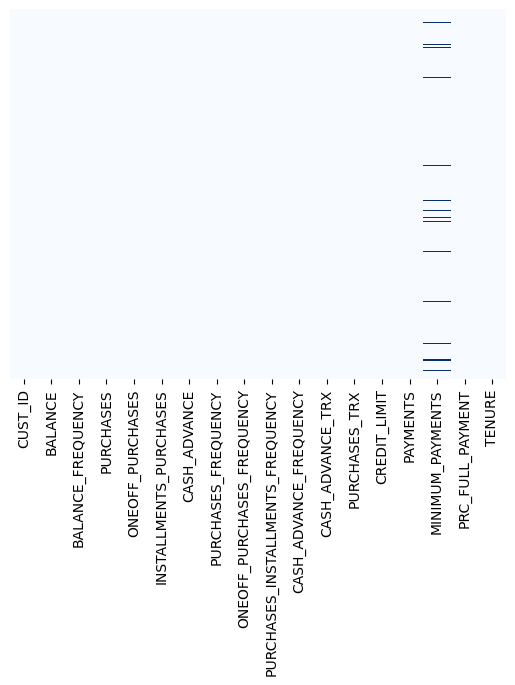

In [ ]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

*As it can be seen, it seems that there are some missing cells in 'MINIMUM_PAYMENT' column  only. Let's verify with another method.*

In [ ]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

*As seen in the table above, there is a missing value in the 'CREDIT_LIMIT' column as well! Given the slightly different results, it can be concluded that data visualization is insightful mainly to demonstrate the overall trends and may not necessarily be suitable for the detail.*

*We have several options to tackle this issue, such as deleting the whole rows associated with the missing cells or filling the blank values with the mean or median of the column. Choosing mean or median will be more beneficial as we won't loose the other useful information in those rows.*

checking the skewness of dataset

In [ ]:
data.skew()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5020\1188251951.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



BALANCE                             2.39
BALANCE_FREQUENCY                  -2.02
PURCHASES                           8.14
ONEOFF_PURCHASES                   10.05
INSTALLMENTS_PURCHASES              7.30
CASH_ADVANCE                        5.17
PURCHASES_FREQUENCY                 0.06
ONEOFF_PURCHASES_FREQUENCY          1.54
PURCHASES_INSTALLMENTS_FREQUENCY    0.51
CASH_ADVANCE_FREQUENCY              1.83
CASH_ADVANCE_TRX                    5.72
PURCHASES_TRX                       4.63
CREDIT_LIMIT                        1.52
PAYMENTS                            5.91
MINIMUM_PAYMENTS                   13.62
PRC_FULL_PAYMENT                    1.94
TENURE                             -2.94
dtype: float64

Since the dataset is found to be skewed, we shall use the median to fill the missing values as the median is more resistant to outliers than the mean

In [ ]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].median()

*Verifying if filling in the blanks was successful:*

In [ ]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

*Checking if there are any duplicates in the dataset:*

In [ ]:
data.duplicated().sum()

0

*The 'CUST_ID' column presence is unnecessary as it does not provide helpful information. Thus, we shall drop it.*

In [ ]:
data.drop("CUST_ID", axis = 1, inplace= True)

detection of outliers in the dataset

<AxesSubplot:>

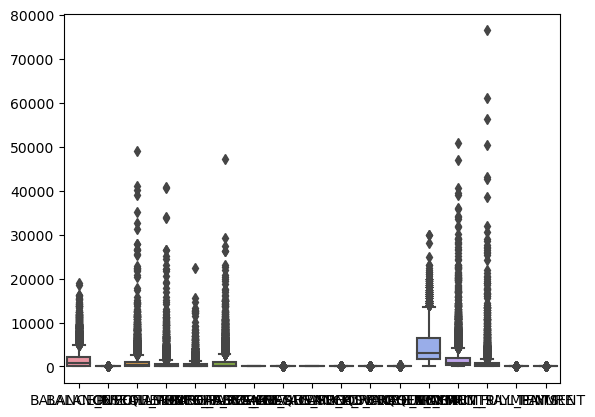

In [ ]:
sns.boxplot(data=data)

Since the data is skewed, a common approach to detecting outliers is to use the interquartile range (IQR) method. The IQR method is based on the interquartile range, which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data.

In [ ]:
# Calculate the interquartile range for each column
Q1 = np.percentile(data, 25, axis=0)
Q3 = np.percentile(data, 75, axis=0)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers as values outside the lower and upper bounds
outliers = np.where((data < lower_bound) | (data > upper_bound))

print("Outliers detected in the following rows and columns: ")
print(outliers)

Outliers detected in the following rows and columns: 
(array([   1,    2,    3, ..., 8948, 8949, 8949], dtype=int64), array([ 5,  7,  1, ..., 16,  1, 16], dtype=int64))


removing the outliers from the dataset - we remove the outliers from the data by selecting only the rows that fall within the range defined by the lower and upper bounds.

In [ ]:
# Remove the outliers from the data
data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [ ]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.90               0.82      95.40              0.00   
4    817.71               1.00      16.00             16.00   
7  1,823.65               1.00     436.20              0.00   
8  1,014.93               1.00     861.49            661.49   
14 2,772.77               1.00       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.40          0.00                 0.17   
4                     0.00          0.00                 0.08   
7                   436.20          0.00                 1.00   
8                   200.00          0.00                 0.33   
14                    0.00        346.81                 0.00   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.00                              0.08   
4                         0.08                              0.00   
7                         0.00                              1.00   
8                         0.08                              0.25   
14                        0.00                              0.00   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.00                 0              2      1,000.00   
4                     0.00                 0              1      1,200.00   
7                     0.00                 0             12      2,300.00   
8                     0.00                 0              5      7,000.00   
14                    0.08                 1              0      3,000.00   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     201.80            139.51              0.00      12  
4     678.33            244.79              0.00      12  
7     679.07            532.03              0.00      12  
8     688.28            311.96              0.00      12  
14    805.65            989.96              0.00      12

In [ ]:
data.shape

(2986, 17)

In [ ]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2986 entries, 0 to 8760
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           2986 non-null   float64
 1   BALANCE_FREQUENCY                 2986 non-null   float64
 2   PURCHASES                         2986 non-null   float64
 3   ONEOFF_PURCHASES                  2986 non-null   float64
 4   INSTALLMENTS_PURCHASES            2986 non-null   float64
 5   CASH_ADVANCE                      2986 non-null   float64
 6   PURCHASES_FREQUENCY               2986 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        2986 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  2986 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            2986 non-null   float64
 10  CASH_ADVANCE_TRX                  2986 non-null   int64  
 11  PURCHASES_TRX                     2986 non-null   int64  
 12  CREDIT

# Data Visualization

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



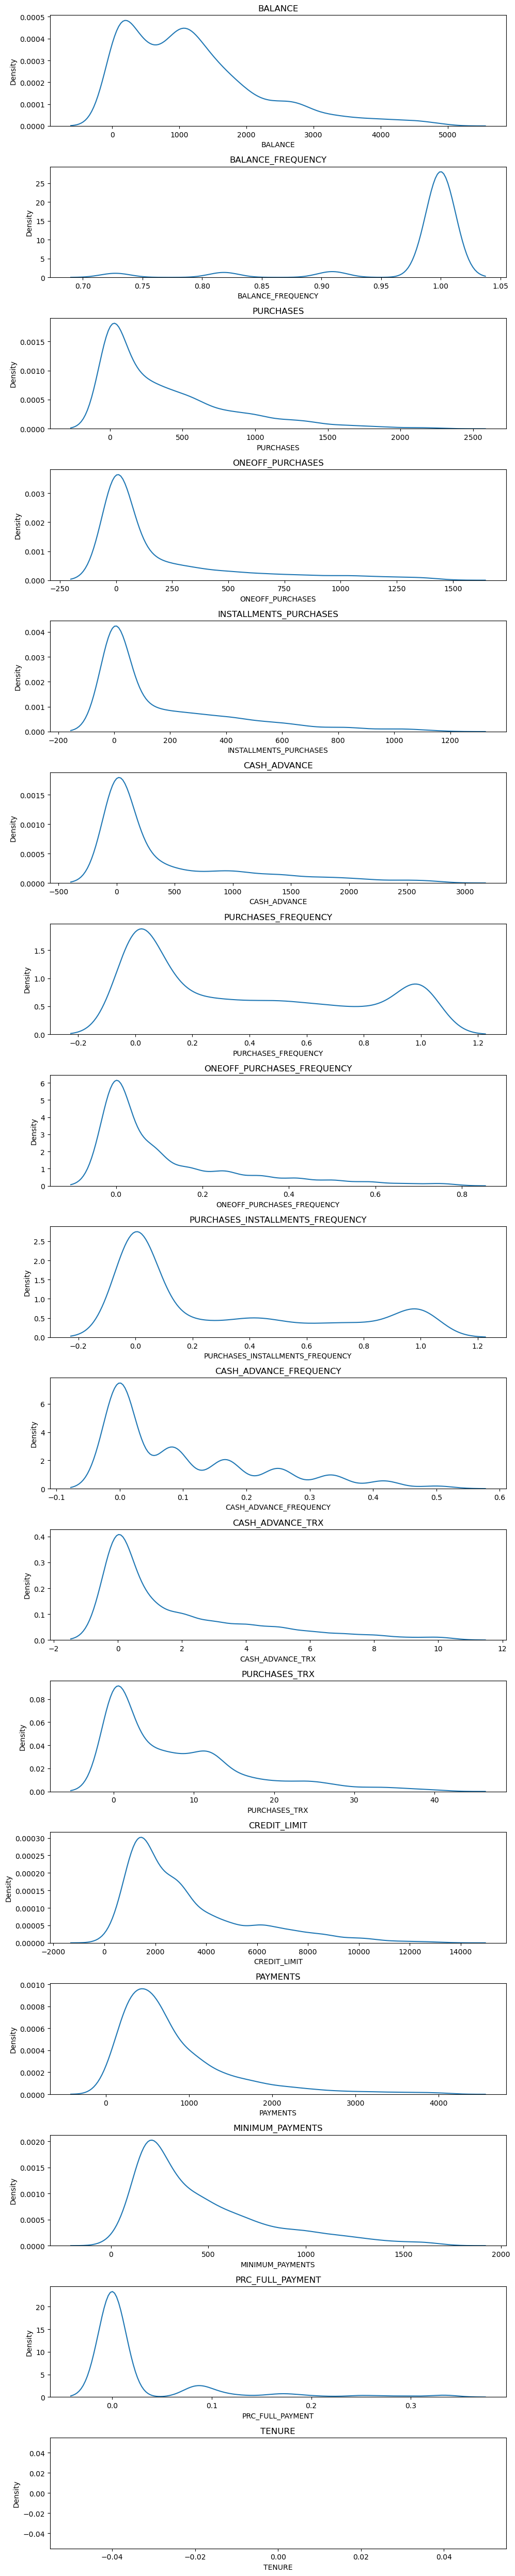

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(data.columns)):
  plt.subplot(17, 1, i+1)
  sns.kdeplot(data[data.columns[i]])
  plt.title(data.columns[i])

plt.tight_layout()

*KDE plot hs been applied to each column and we can see the distribution of the values in each column.*

* Mean of balance is 1500 dollar
* 'Balance_Frequency' for most customers is updated frequently ~1
* For 'PURCHASES_FREQUENCY', there are two distinct group of customers
* For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
* Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
* Credit limit average is around $4500
* Most customers are ~11 years tenure

In [ ]:
correlations = data.corr()
correlations

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                              1.00               0.28      -0.03   
BALANCE_FREQUENCY                    0.28               1.00       0.00   
PURCHASES                           -0.03               0.00       1.00   
ONEOFF_PURCHASES                     0.04              -0.01       0.82   
INSTALLMENTS_PURCHASES              -0.11               0.01       0.67   
CASH_ADVANCE                         0.37               0.03      -0.20   
PURCHASES_FREQUENCY                 -0.20               0.02       0.60   
ONEOFF_PURCHASES_FREQUENCY           0.01               0.01       0.61   
PURCHASES_INSTALLMENTS_FREQUENCY    -0.20               0.03       0.45   
CASH_ADVANCE_FREQUENCY               0.35               0.11      -0.26   
CASH_ADVANCE_TRX                     0.32               0.09      -0.22   
PURCHASES_TRX                       -0.11               0.05       0.71   
CREDIT_LIMIT                         0.32              -0.03       0.21   
PAYMENTS                             0.21              -0.08       0.21   
MINIMUM_PAYMENTS                     0.78               0.24       0.01   
PRC_FULL_PAYMENT                    -0.36              -0.27       0.09   
TENURE                                NaN                NaN        NaN   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                       0.04                   -0.11   
BALANCE_FREQUENCY                            -0.01                    0.01   
PURCHASES                                     0.82                    0.67   
ONEOFF_PURCHASES                              1.00                    0.12   
INSTALLMENTS_PURCHASES                        0.12                    1.00   
CASH_ADVANCE                                 -0.13                   -0.19   
PURCHASES_FREQUENCY                           0.24                    0.73   
ONEOFF_PURCHASES_FREQUENCY                    0.75                    0.09   
PURCHASES_INSTALLMENTS_FREQUENCY              0.01                    0.76   
CASH_ADVANCE_FREQUENCY                       -0.15                   -0.25   
CASH_ADVANCE_TRX                             -0.12                   -0.23   
PURCHASES_TRX                                 0.41                    0.70   
CREDIT_LIMIT                                  0.21                    0.09   
PAYMENTS                                      0.19                    0.12   
MINIMUM_PAYMENTS                              0.01                    0.01   
PRC_FULL_PAYMENT                             -0.00                    0.15   
TENURE                                         NaN                     NaN   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                                   0.37                -0.20   
BALANCE_FREQUENCY                         0.03                 0.02   
PURCHASES                                -0.20                 0.60   
ONEOFF_PURCHASES                         -0.13                 0.24   
INSTALLMENTS_PURCHASES                   -0.19                 0.73   
CASH_ADVANCE                              1.00                -0.31   
PURCHASES_FREQUENCY                      -0.31                 1.00   
ONEOFF_PURCHASES_FREQUENCY               -0.15                 0.33   
PURCHASES_INSTALLMENTS_FREQUENCY         -0.26                 0.93   
CASH_ADVANCE_FREQUENCY                    0.64                -0.38   
CASH_ADVANCE_TRX                          0.68                -0.33   
PURCHASES_TRX                            -0.24                 0.85   
CREDIT_LIMIT                              0.08                 0.03   
PAYMENTS                                  0.32                 0.01   
MINIMUM_PAYMENTS                          0.22                -0.04   
PRC_FULL_PAYMENT                         -0.04                 0.20   
TENURE                                     NaN                  NaN   


<AxesSubplot:>

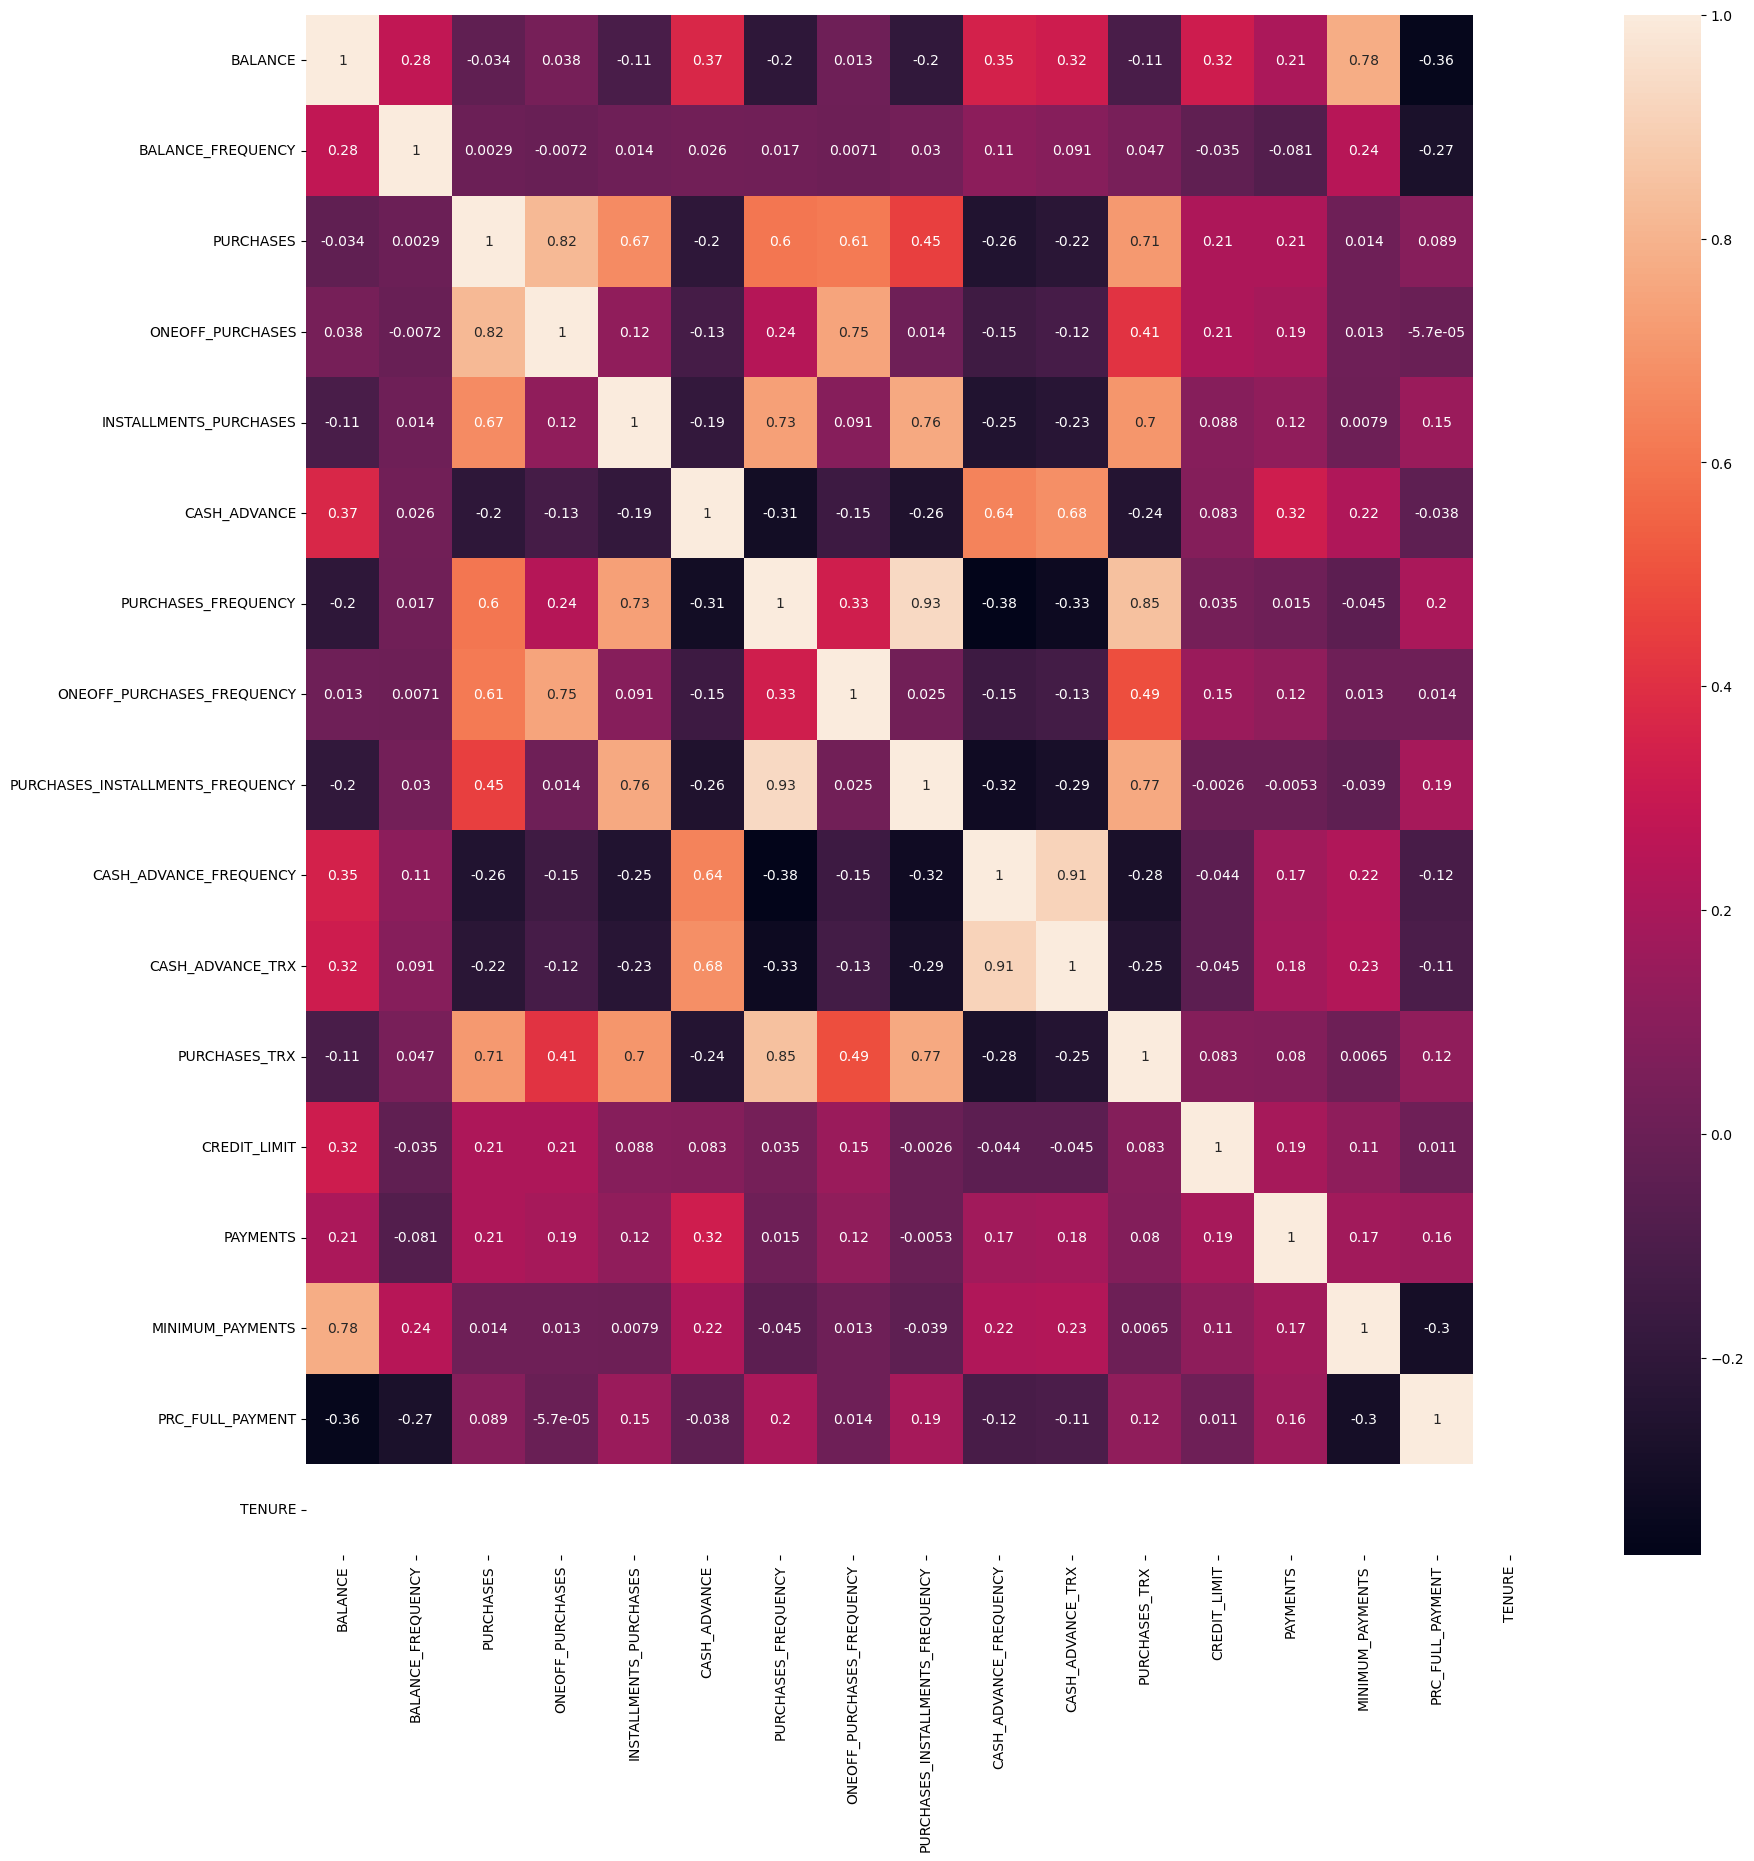

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

*The heatmap shows that:*

* 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
* Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

*As in general, removing one of the correlated variables before training the model benefits the learning process and can result in a similar performance to the full model, it is possible to drop some of the columns before applying the ML model.*

**Scaling**

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data_scaled

array([[-1.1329738 , -2.60151595, -0.63243332, ..., -0.94061746,
        -0.41509199,  0.        ],
       [-0.37491106,  0.33984211, -0.81138652, ..., -0.63474837,
        -0.41509199,  0.        ],
       [ 0.60674586,  0.33984211,  0.13566809, ...,  0.19976408,
        -0.41509199,  0.        ],
       ...,
       [-1.1568555 , -1.13083692,  0.14761333, ..., -1.08059612,
         4.44571249,  0.        ],
       [-1.1071364 ,  0.33984211, -0.18257111, ..., -0.86038532,
         3.95963641,  0.        ],
       [-0.87317302,  0.33984211,  1.2019497 , ..., -0.82513724,
        -0.41509199,  0.        ]])

# Applying KMEANS clustering

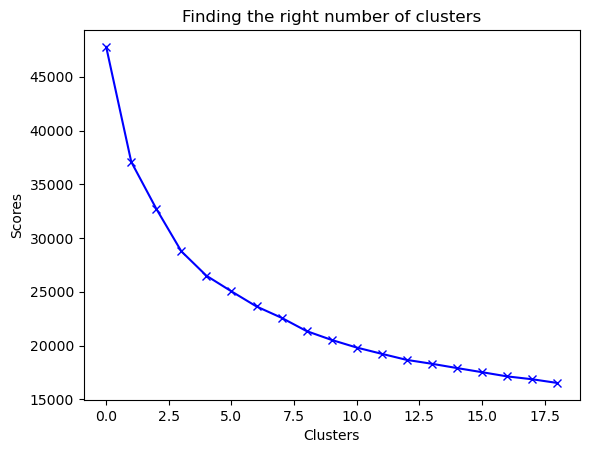

In [ ]:
scores_1 = []

for i in range(1, 20):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(data_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
However, the values does not reduce linearly until 8th cluster. 
Let's choose the number of clusters to be 8.

##Training the Model

In [ ]:
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_

array([[-0.96693317, -3.15961978, -0.01957275, -0.02966004,  0.0036004 ,
        -0.40697023,  0.03977942, -0.01379188, -0.03244965, -0.57756898,
        -0.54079894, -0.14223819,  0.21140574, -0.11625158, -0.85454658,
         1.06405753,  0.        ],
       [ 0.11313543,  0.23381641, -0.69464951, -0.45798318, -0.61085102,
         0.73387513, -0.85599054, -0.46358838, -0.70649717,  1.36148216,
         1.31059384, -0.7220894 , -0.36384123, -0.28918783, -0.08669755,
        -0.32478694,  0.        ],
       [ 0.0455869 ,  0.19503679,  0.95207639,  1.58220357, -0.40071787,
        -0.40555605,  0.20457007,  1.56466267, -0.47589013, -0.4275232 ,
        -0.39952029,  0.29416228,  0.17605804,  0.04582956,  0.06653166,
        -0.16639303,  0.        ],
       [ 0.21823972,  0.22246397,  2.33292459,  1.82067289,  1.68005438,
        -0.22672252,  1.25649209,  1.59024455,  1.15023407, -0.18816152,
        -0.18530862,  1.98456521,  0.69573637,  0.75700391,  0.14112815,
         0.12308566

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data.columns])
cluster_centers          

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES INSTALLMENTS_PURCHASES  \
0   -0.97             -3.16     -0.02            -0.03                   0.00   
1    0.11              0.23     -0.69            -0.46                  -0.61   
2    0.05              0.20      0.95             1.58                  -0.40   
3    0.22              0.22      2.33             1.82                   1.68   
4   -0.47              0.24      0.27            -0.42                   1.02   
5    2.01              0.29     -0.48            -0.33                  -0.41   
6   -0.03             -0.38     -0.49            -0.30                  -0.45   
7   -0.18              0.30     -0.59            -0.39                  -0.52   

  CASH_ADVANCE PURCHASES_FREQUENCY ONEOFF_PURCHASES_FREQUENCY  \
0        -0.41                0.04                      -0.01   
1         0.73               -0.86                      -0.46   
2        -0.41                0.20                       1.56   
3        -0.23                1.26                       1.59   
4        -0.47                1.30                      -0.37   
5         1.26               -0.55                      -0.37   
6         1.67               -0.71                      -0.40   
7        -0.43               -0.66                      -0.33   

  PURCHASES_INSTALLMENTS_FREQUENCY CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX  \
0                            -0.03                  -0.58            -0.54   
1                            -0.71                   1.36             1.31   
2                            -0.48                  -0.43            -0.40   
3                             1.15                  -0.19            -0.19   
4                             1.43                  -0.58            -0.53   
5                            -0.45                   0.92             0.92   
6                            -0.59                   0.87             0.93   
7                            -0.58                  -0.39            -0.43   

  PURCHASES_TRX CREDIT_LIMIT PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT TENURE  
0         -0.14         0.21    -0.12            -0.85             1.06   0.00  
1         -0.72        -0.36    -0.29            -0.09            -0.32   0.00  
2          0.29         0.18     0.05             0.07            -0.17   0.00  
3          1.98         0.70     0.76             0.14             0.12   0.00  
4          0.86        -0.23    -0.22            -0.15             0.29   0.00  
5         -0.48         0.91     0.26             1.73            -0.42   0.00  
6         -0.62        -0.04     2.58            -0.15             0.77   0.00  
7         -0.62        -0.22    -0.45            -0.22            -0.29   0.00

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [data.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0   211.05              0.78    367.32           190.05   
1 1,317.83              0.99     67.80            47.70   
2 1,248.61              0.99    798.43           725.75   
3 1,425.54              0.99  1,411.10           805.01   
4   724.11              0.99    495.70            60.07   
5 3,257.74              1.00    163.18            90.75   
6 1,170.94              0.96    159.91            99.48   
7 1,017.88              1.00    113.13            70.84   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0                 177.27       152.85                0.41   
1                  20.10       894.69                0.07   
2                  73.85       153.77                0.47   
3                 606.10       270.06                0.86   
4                 436.20       111.22                0.88   
5                  72.44     1,233.95                0.19   
6                  60.43     1,502.96                0.13   
7                  42.31       136.42                0.15   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.11                             0.29   
1                       0.04                             0.04   
2                       0.39                             0.12   
3                       0.39                             0.73   
4                       0.05                             0.84   
5                       0.05                             0.13   
6                       0.05                             0.08   
7                       0.06                             0.09   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT PAYMENTS  \
0                   0.03             0.47          6.39     3,707.69   734.04   
1                   0.28             4.96          1.27     2,313.14   613.54   
2                   0.05             0.81         10.24     3,622.00   846.97   
3                   0.08             1.33         25.17     4,881.84 1,342.48   
4                   0.03             0.50         15.26     2,646.35   662.75   
5                   0.22             4.02          3.43     5,394.53   996.30   
6                   0.21             4.03          2.21     3,109.74 2,609.53   
7                   0.05             0.73          2.17     2,655.14   502.32   

  MINIMUM_PAYMENTS PRC_FULL_PAYMENT TENURE  
0           169.14             0.10  12.00  
1           433.43             0.01  12.00  
2           486.17             0.02  12.00  
3           511.85             0.04  12.00  
4           409.99             0.05  12.00  
5         1,057.95             0.00  12.00  
6           413.29             0.08  12.00  
7           388.85             0.01  12.00

* First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (104 dollar) and cash advance (303 dollar), Percentage of full payment = 23%
* Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (5000 dollar) and cash advance (~5000 dollar), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
* Third customer cluster (VIP/Prime): high credit limit 16K dollar and highest percentage of full payment, target for increase credit limit and increase spending habits
* Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

In [ ]:
y_kmeans = kmeans.fit_predict(data_scaled)
y_kmeans

array([0, 7, 4, ..., 4, 4, 4])

In [ ]:
data_cluster = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)

In [ ]:
data_cluster.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.90               0.82      95.40              0.00   
4    817.71               1.00      16.00             16.00   
7  1,823.65               1.00     436.20              0.00   
8  1,014.93               1.00     861.49            661.49   
14 2,772.77               1.00       0.00              0.00   
18 1,989.07               1.00     504.35            166.00   
25   169.78               1.00     399.60              0.00   
26 1,615.97               1.00     102.00            102.00   
27   125.69               1.00     233.28              0.00   
29    22.06               1.00     100.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.40          0.00                 0.17   
4                     0.00          0.00                 0.08   
7                   436.20          0.00                 1.00   
8                   200.00          0.00                 0.33   
14                    0.00        346.81                 0.00   
18                  338.35          0.00                 0.67   
25                  399.60          0.00                 1.00   
26                    0.00        244.84                 0.17   
27                  233.28          0.00                 1.00   
29                  100.00          0.00                 0.42   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.00                              0.08   
4                         0.08                              0.00   
7                         0.00                              1.00   
8                         0.08                              0.25   
14                        0.00                              0.00   
18                        0.08                              0.58   
25                        0.00                              1.00   
26                        0.17                              0.00   
27                        0.00                              1.00   
29                        0.00                              0.42   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.00              0.00           2.00      1,000.00   
4                     0.00              0.00           1.00      1,200.00   
7                     0.00              0.00          12.00      2,300.00   
8                     0.00              0.00           5.00      7,000.00   
14                    0.08              1.00           0.00      3,000.00   
18                    0.00              0.00           9.00     13,000.00   
25                    0.00              0.00          12.00      3,000.00   
26                    0.25              5.00           2.00      1,700.00   
27                    0.00              0.00          12.00      1,000.00   
29                    0.00              0.00           5.00      6,900.00   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0     201.80            139.51              0.00   12.00     0.00  
4     678.33            244.79              0.00   12.00     5.00  
7     679.07            532.03              0.00   12.00     1.00  
8     688.28            311.96              0.00   12.00     4.00  
14    805.65            989.96              0.00   12.00     7.00  
18  1,720.84            744.61              0.00   12.00     0.00  
25    215.31            163.01              0.00   12.00     5.00  
26    890.18            971.18              0.00   12.00     7.00  
27    207.77            164.75              0.00   12.00     7.00  
29    160.77            159.68              0.00   12.00     2.00

*Plotting the histogram of various clusters:*

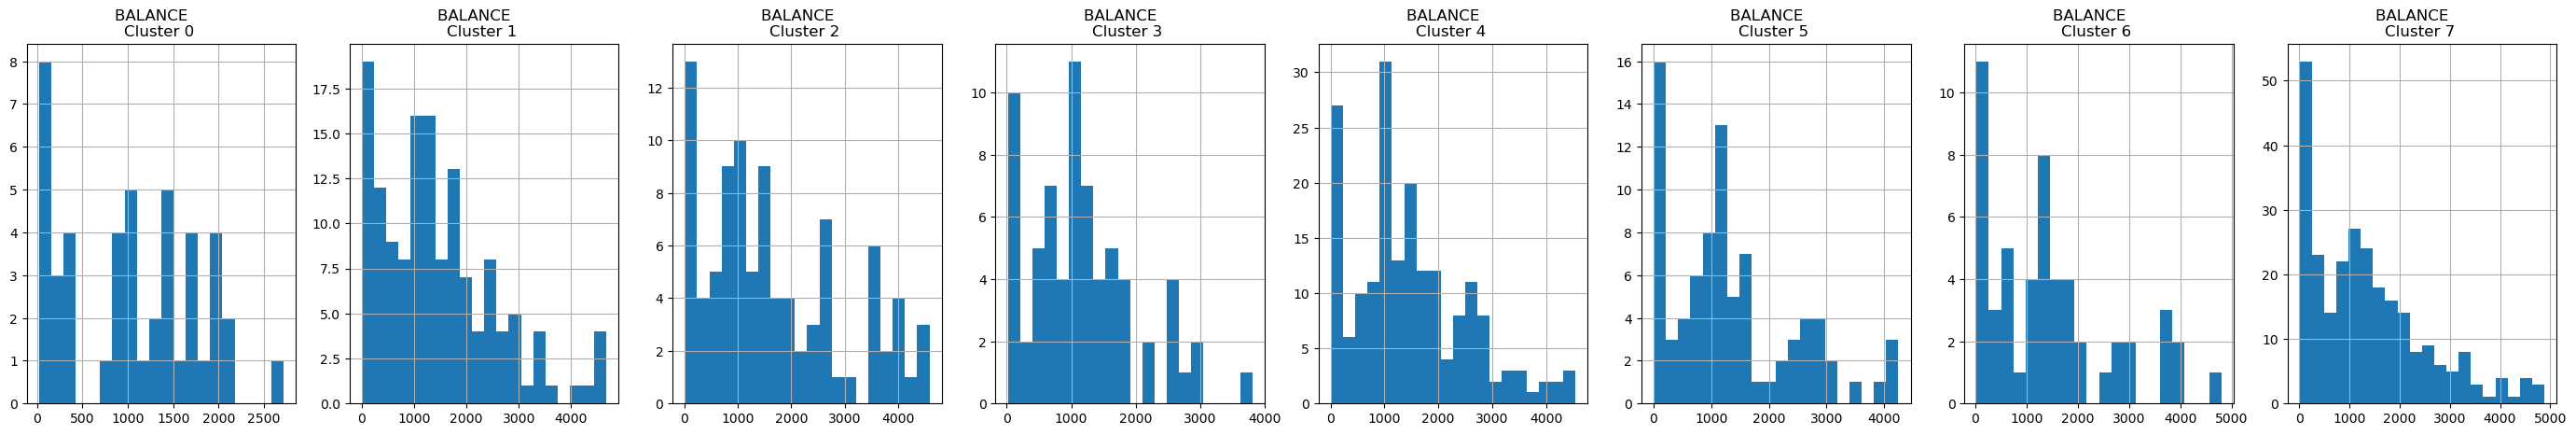

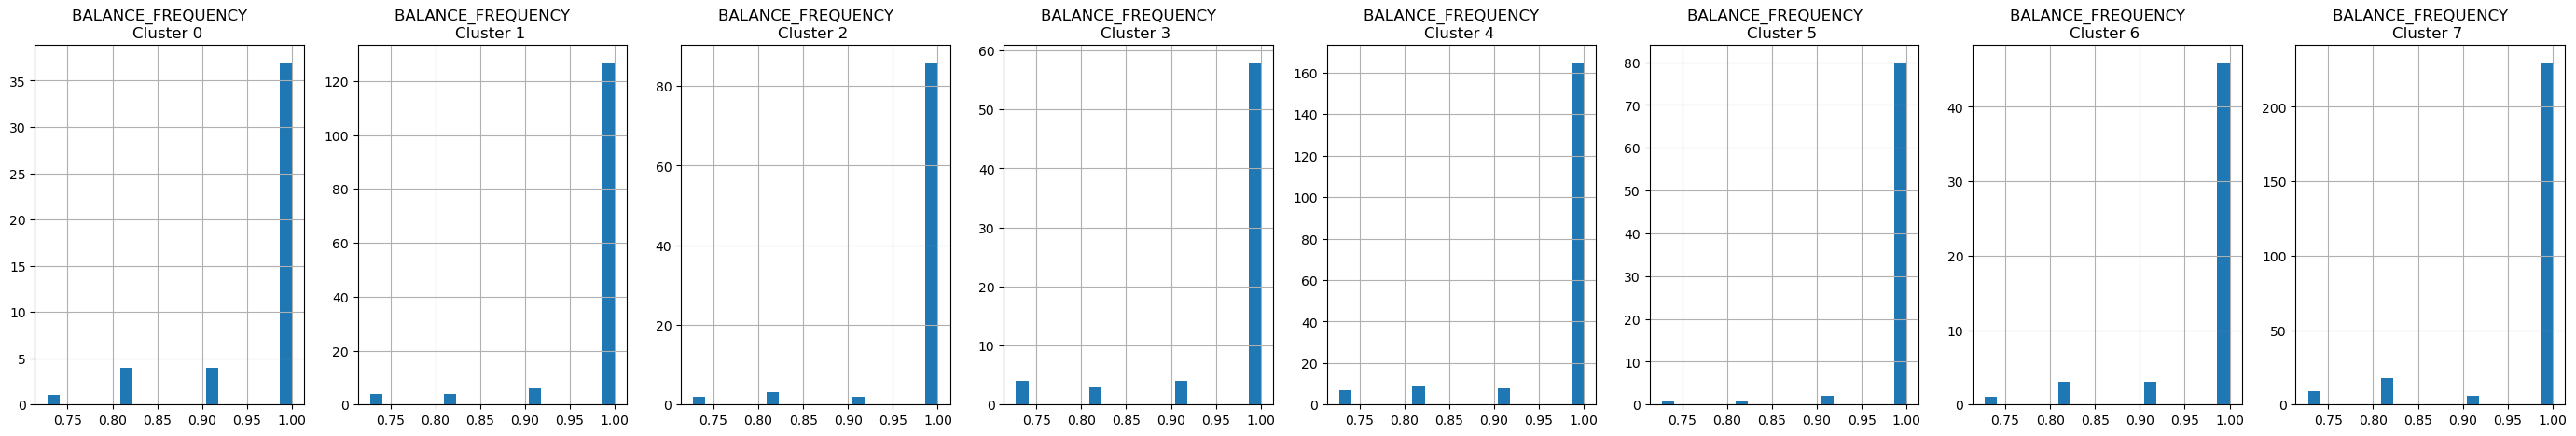

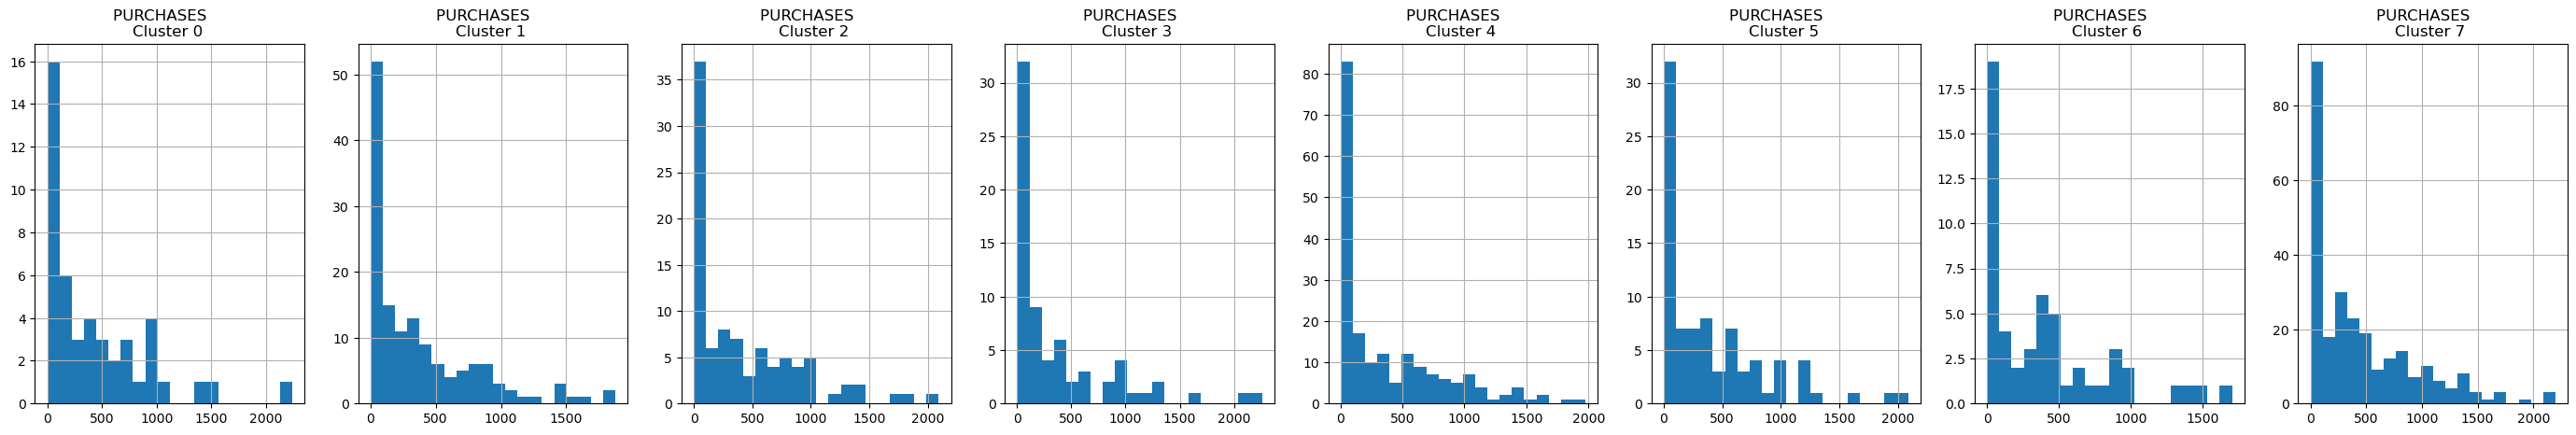

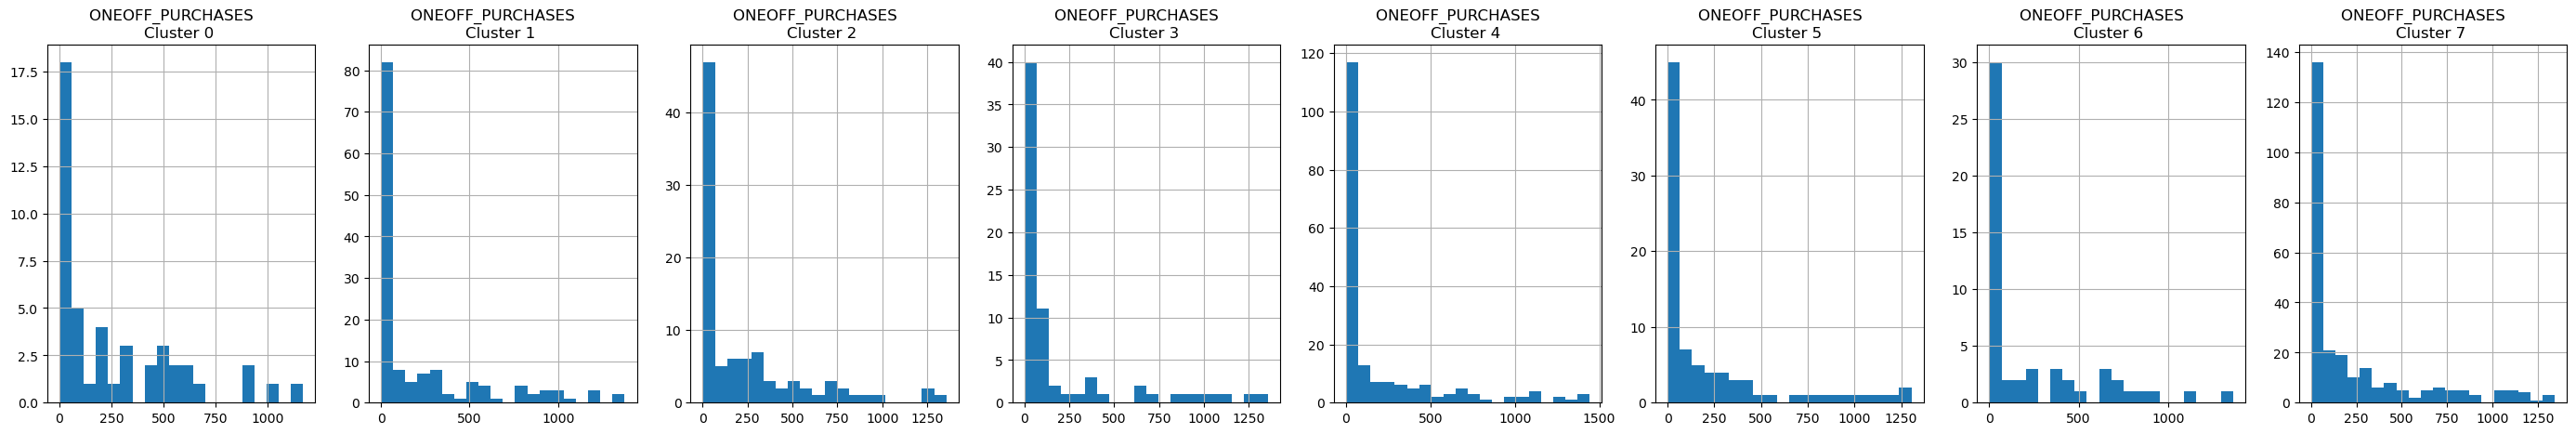

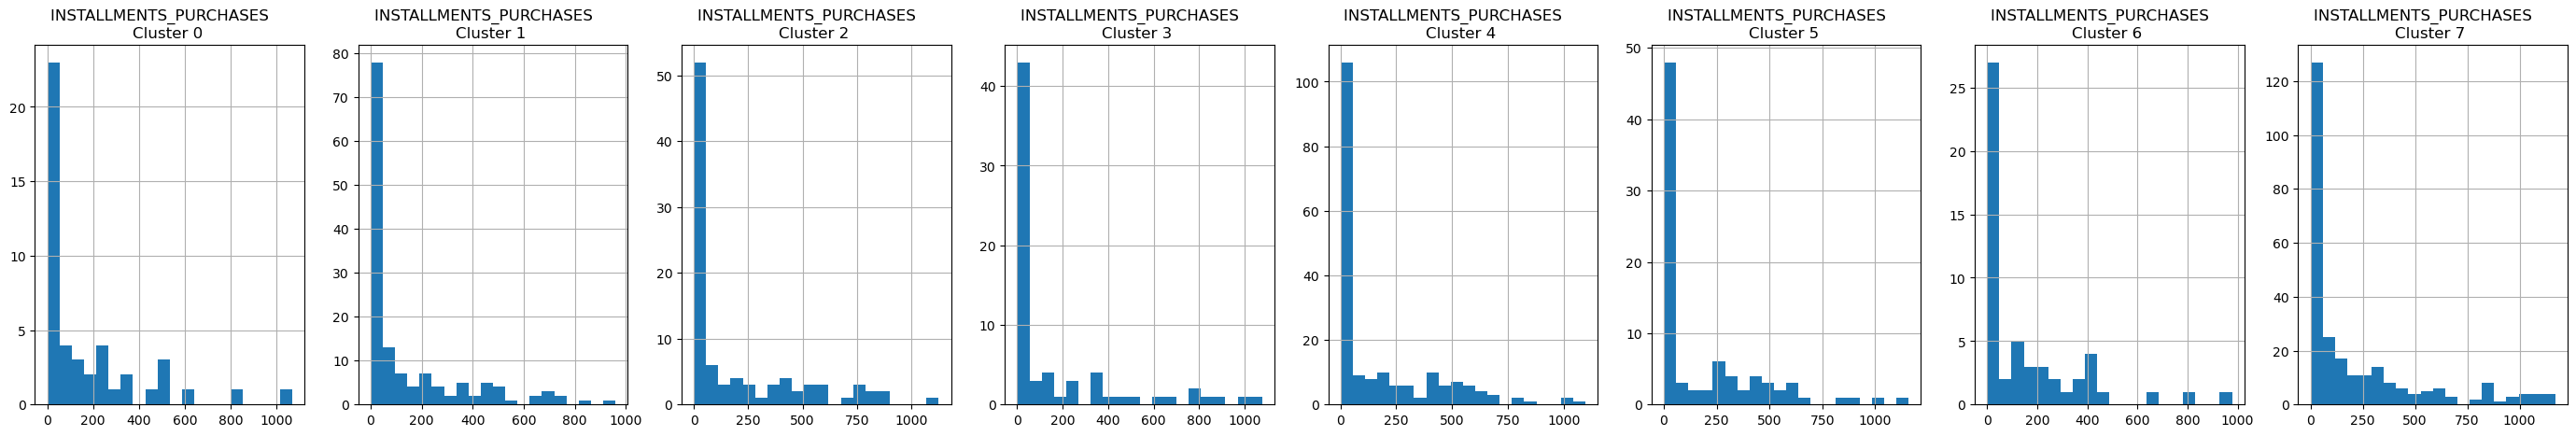

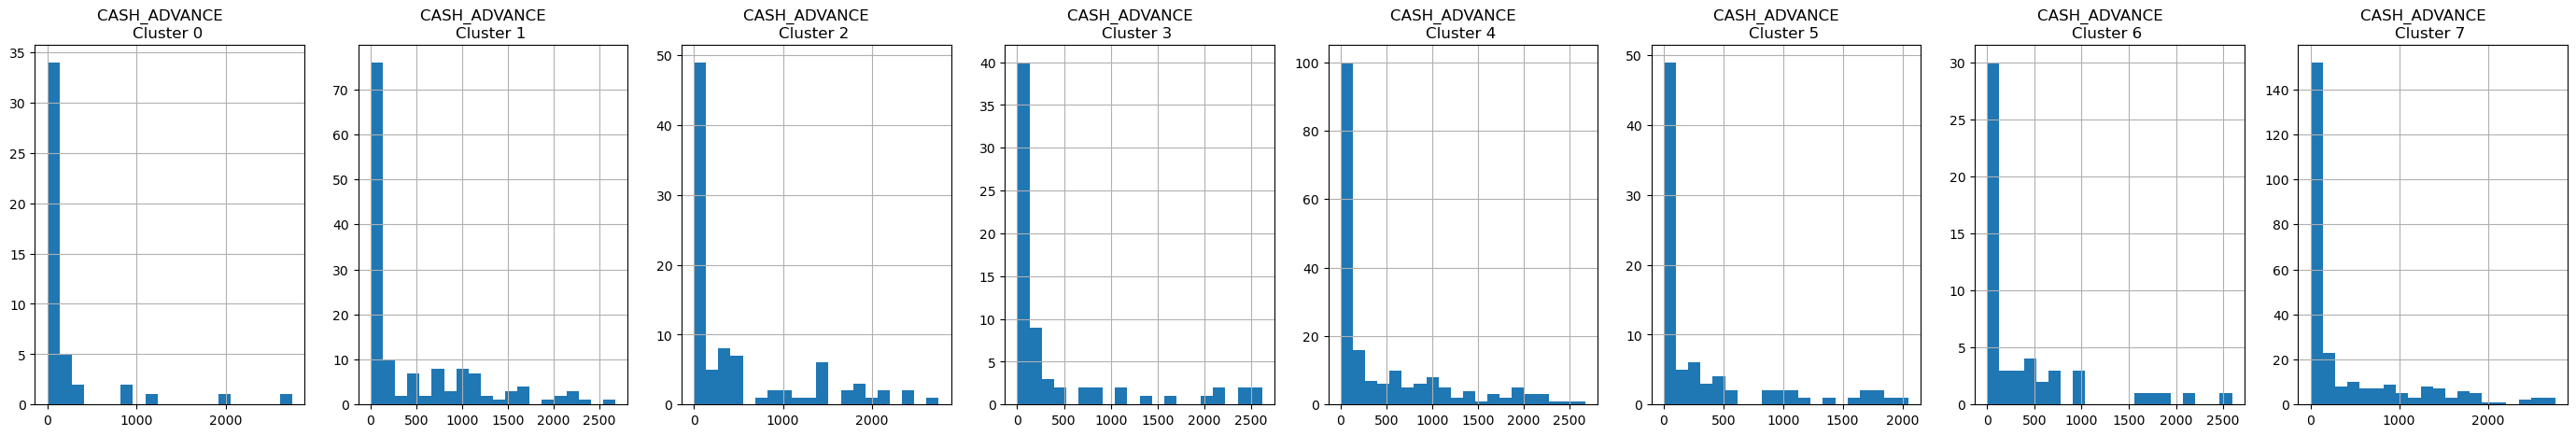

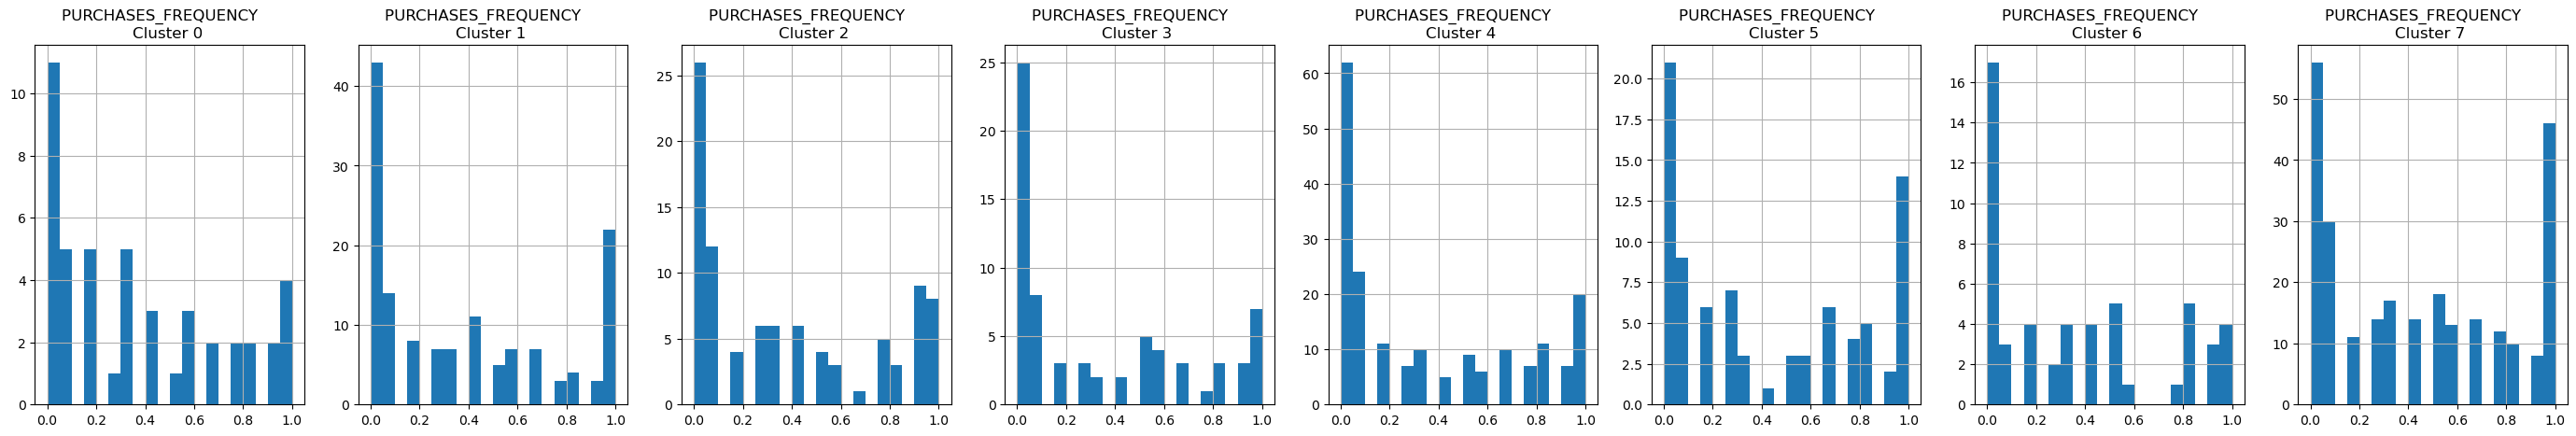

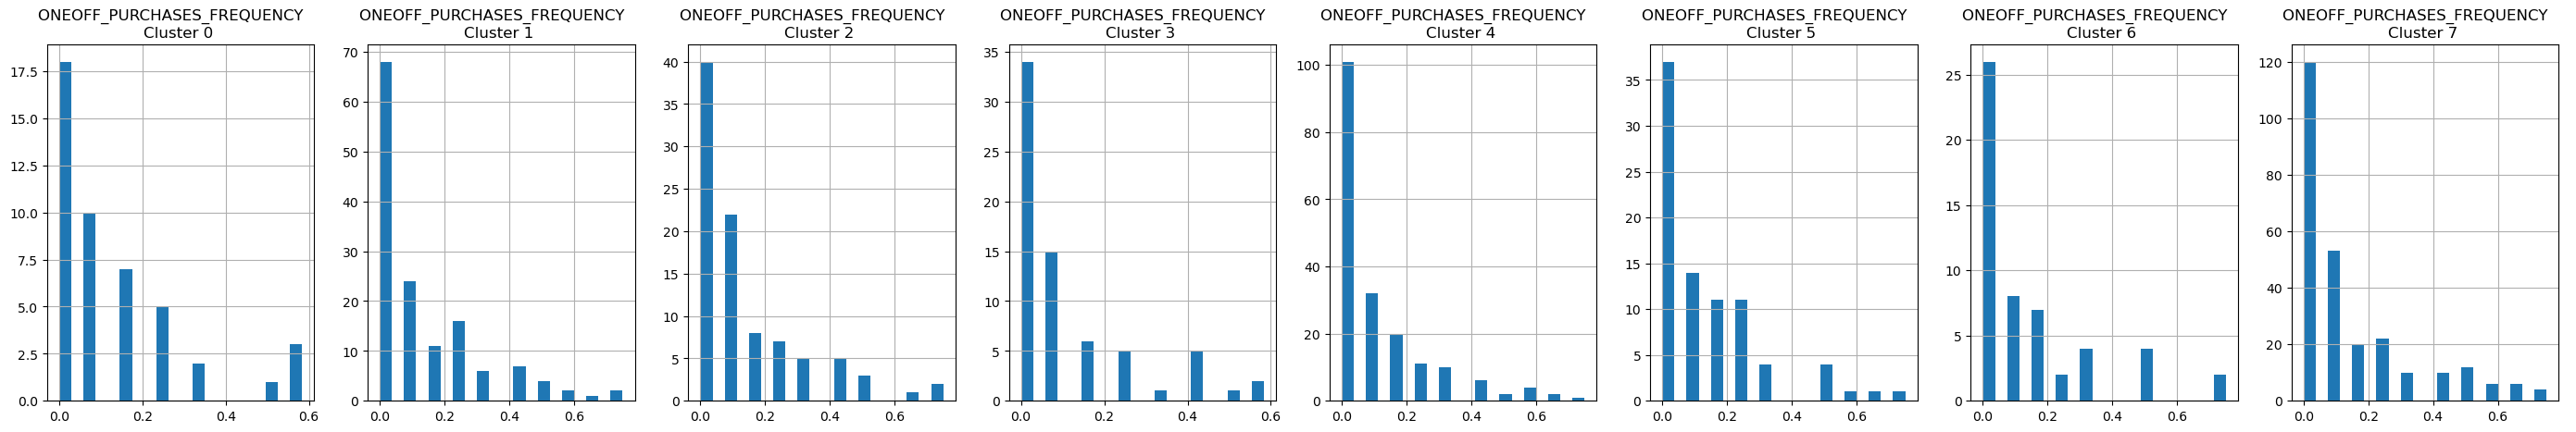

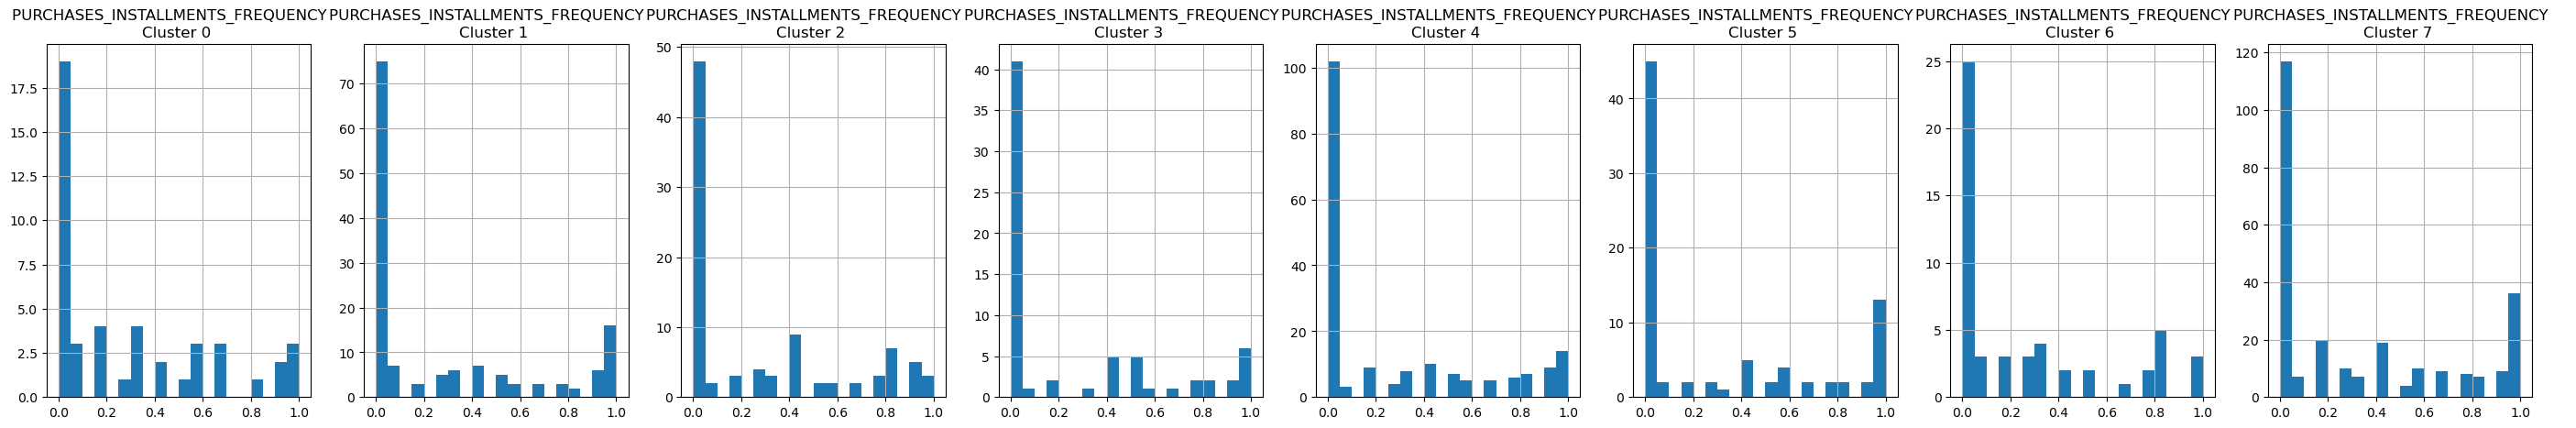

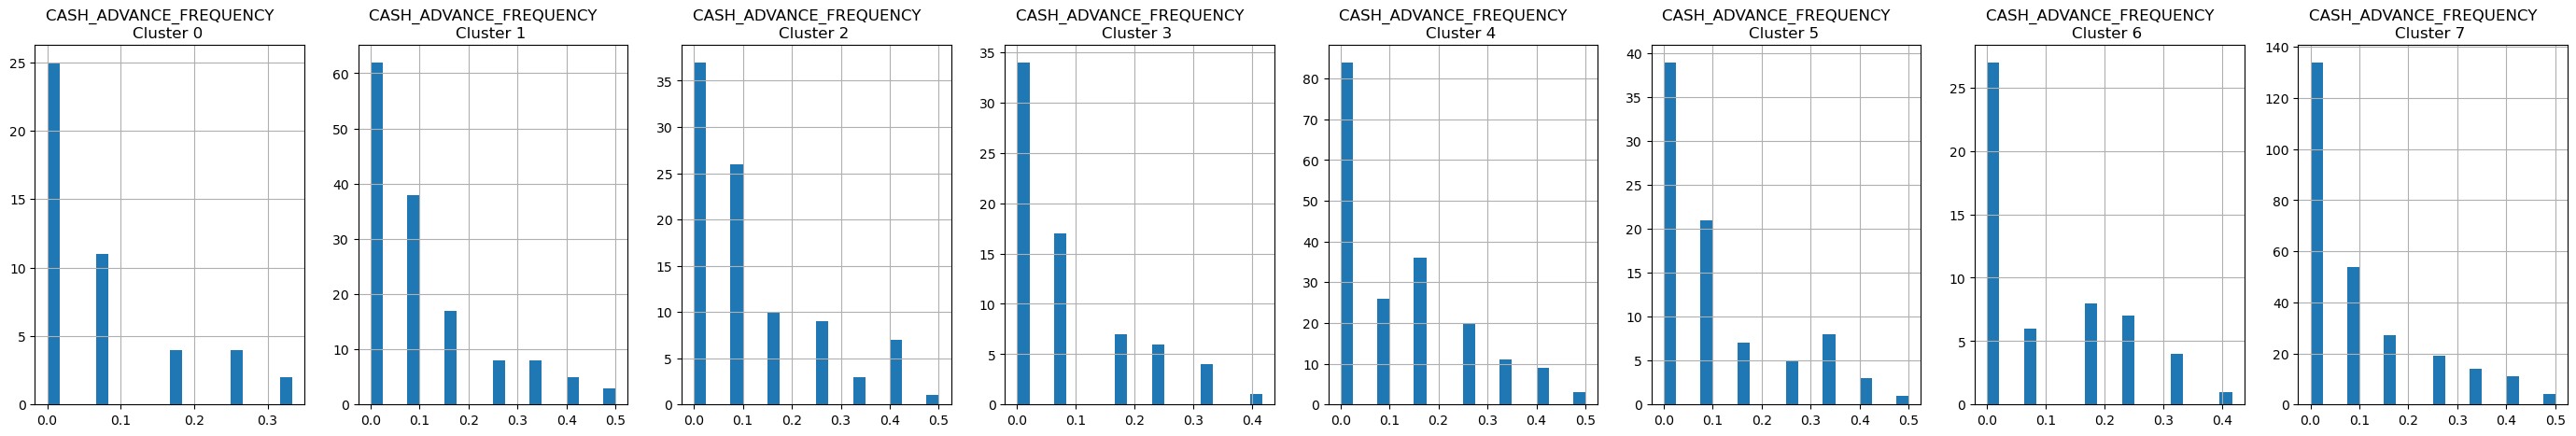

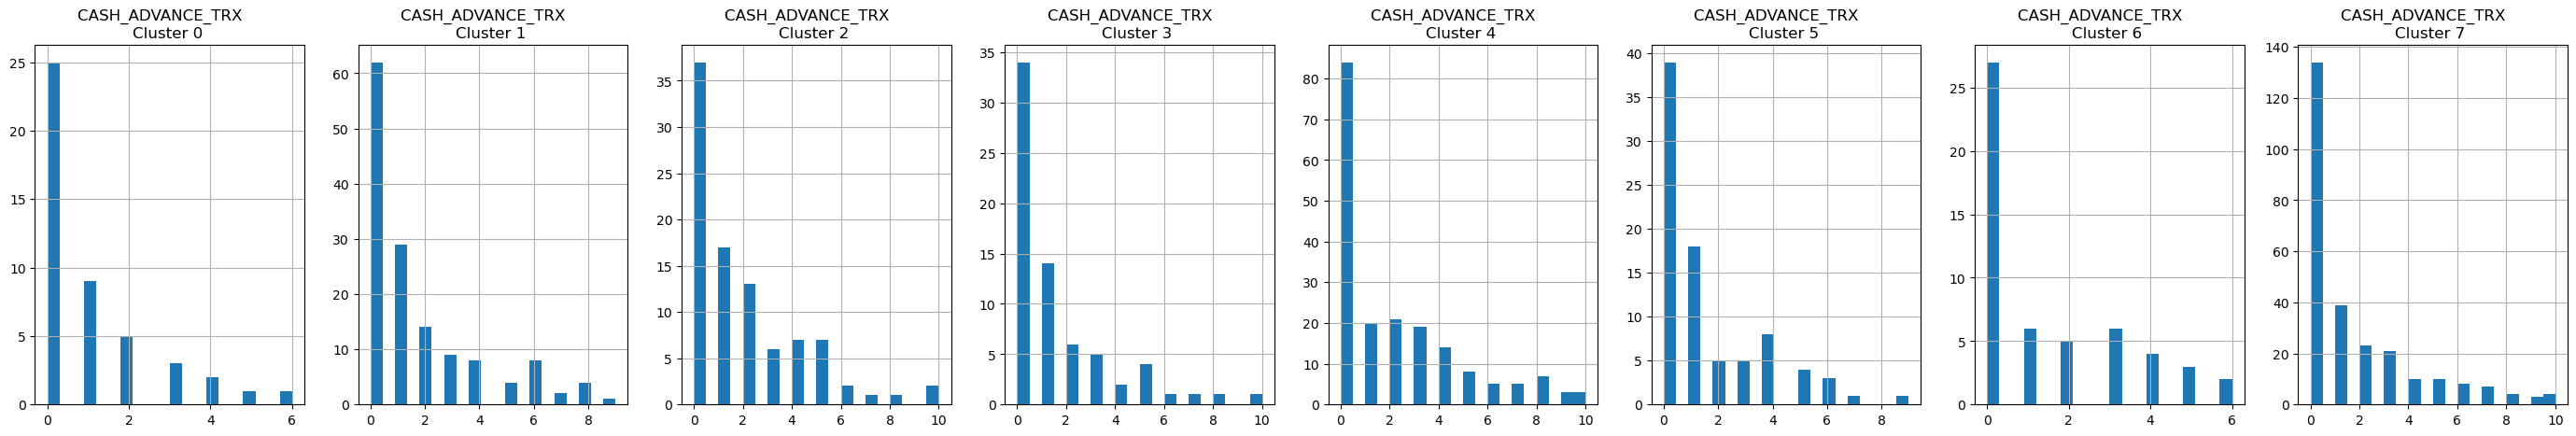

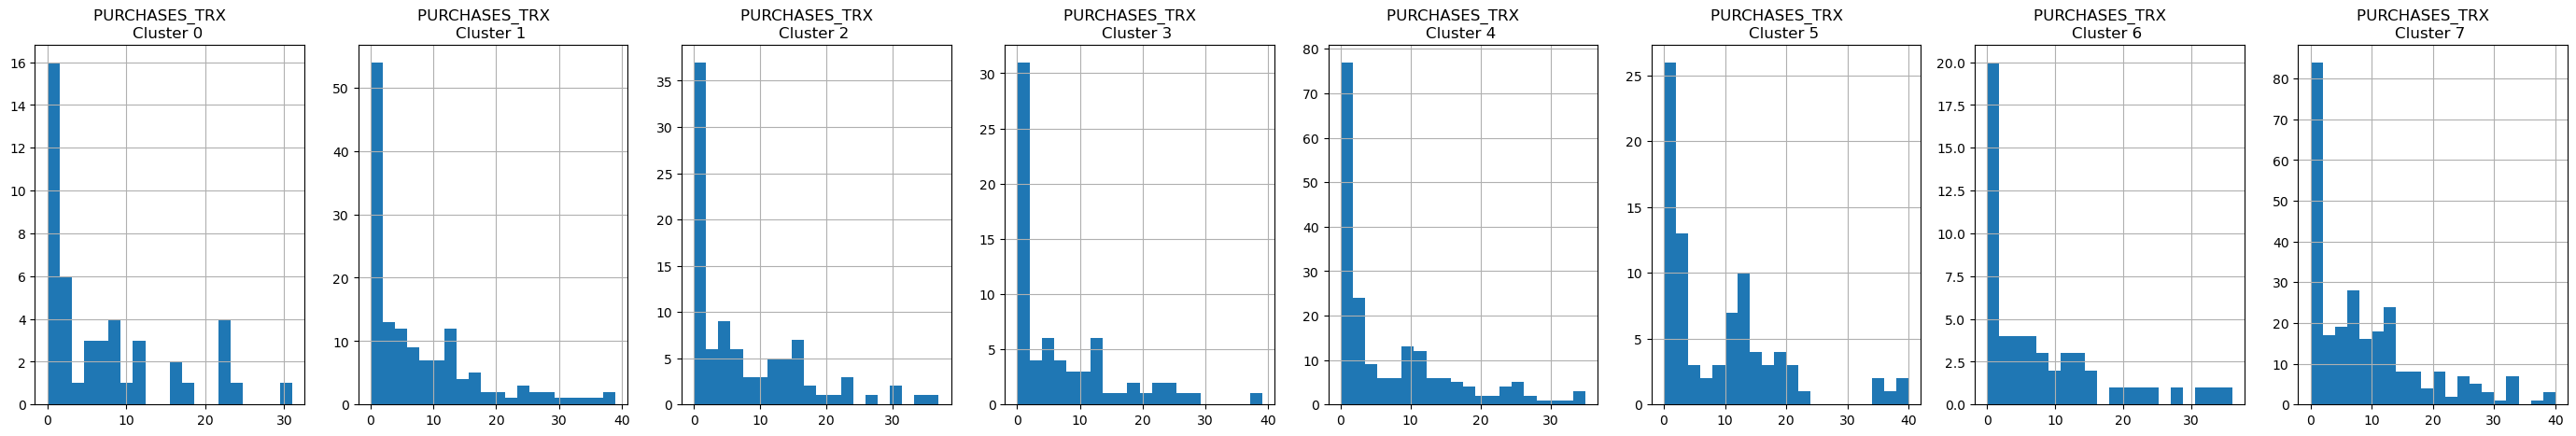

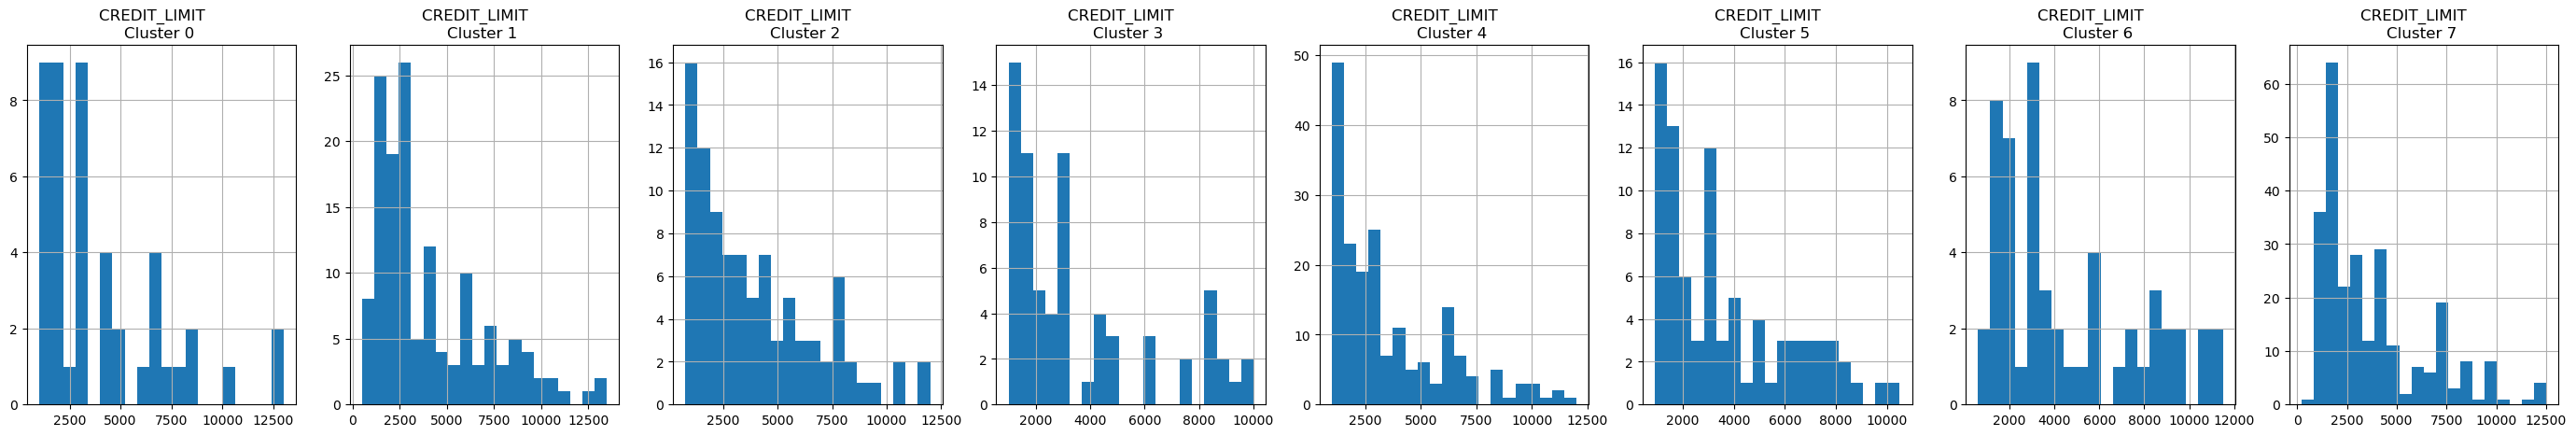

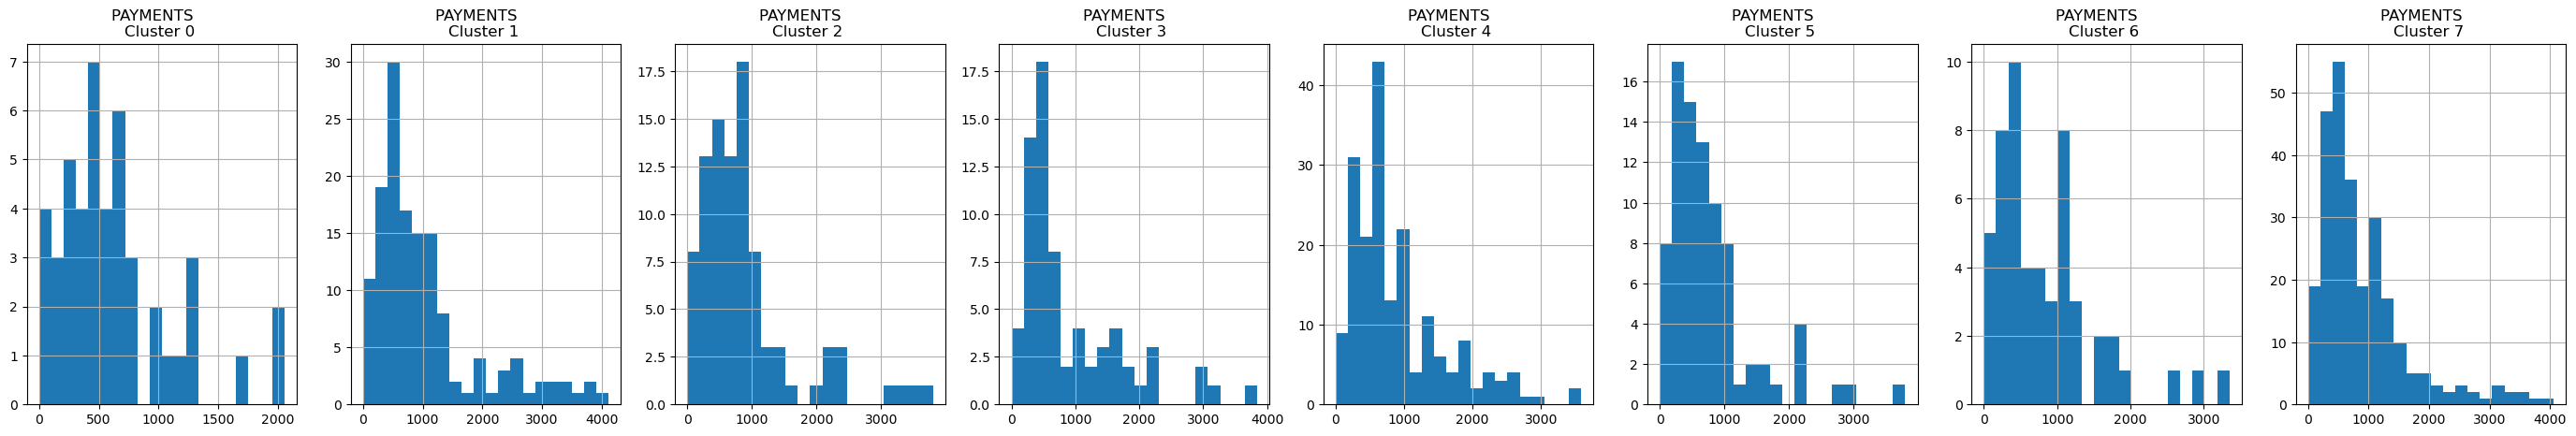

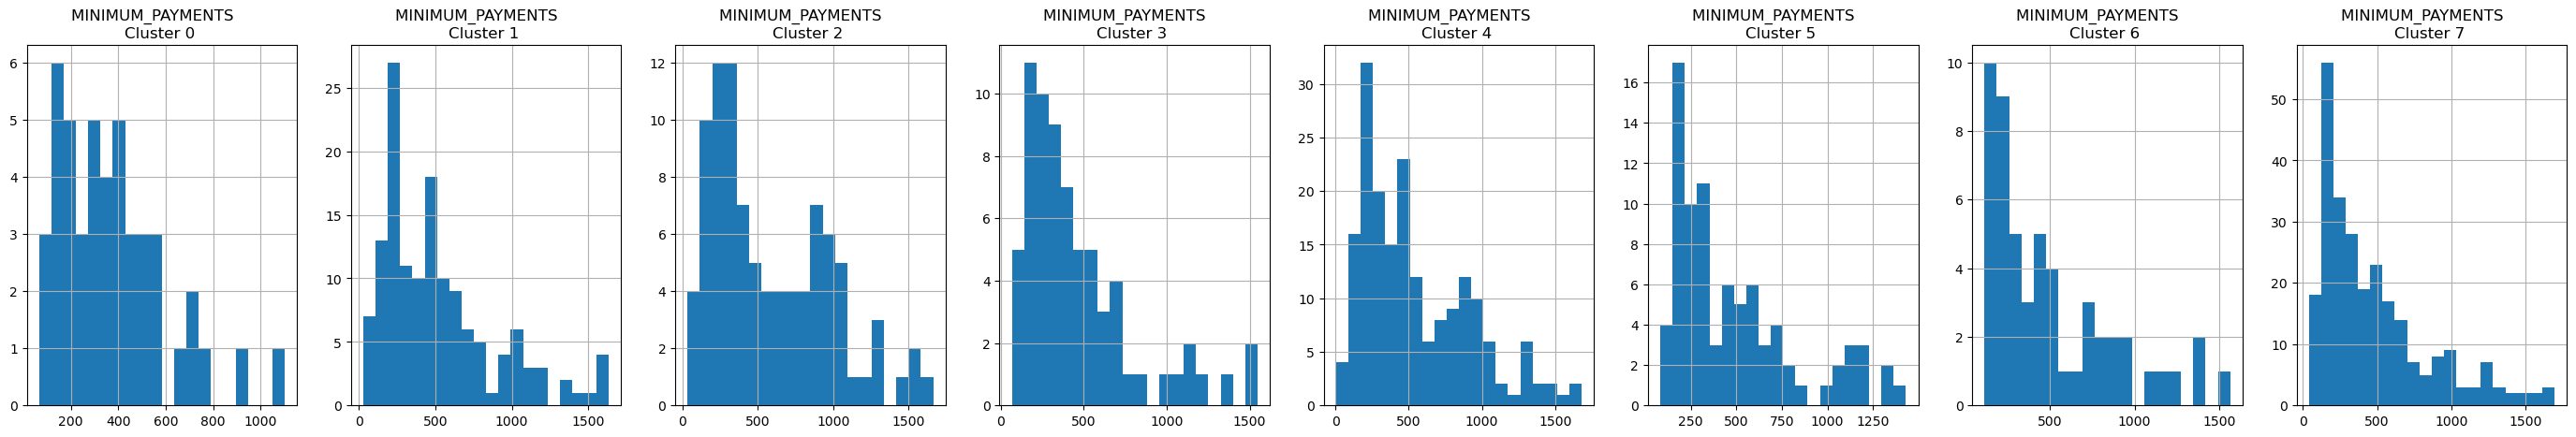

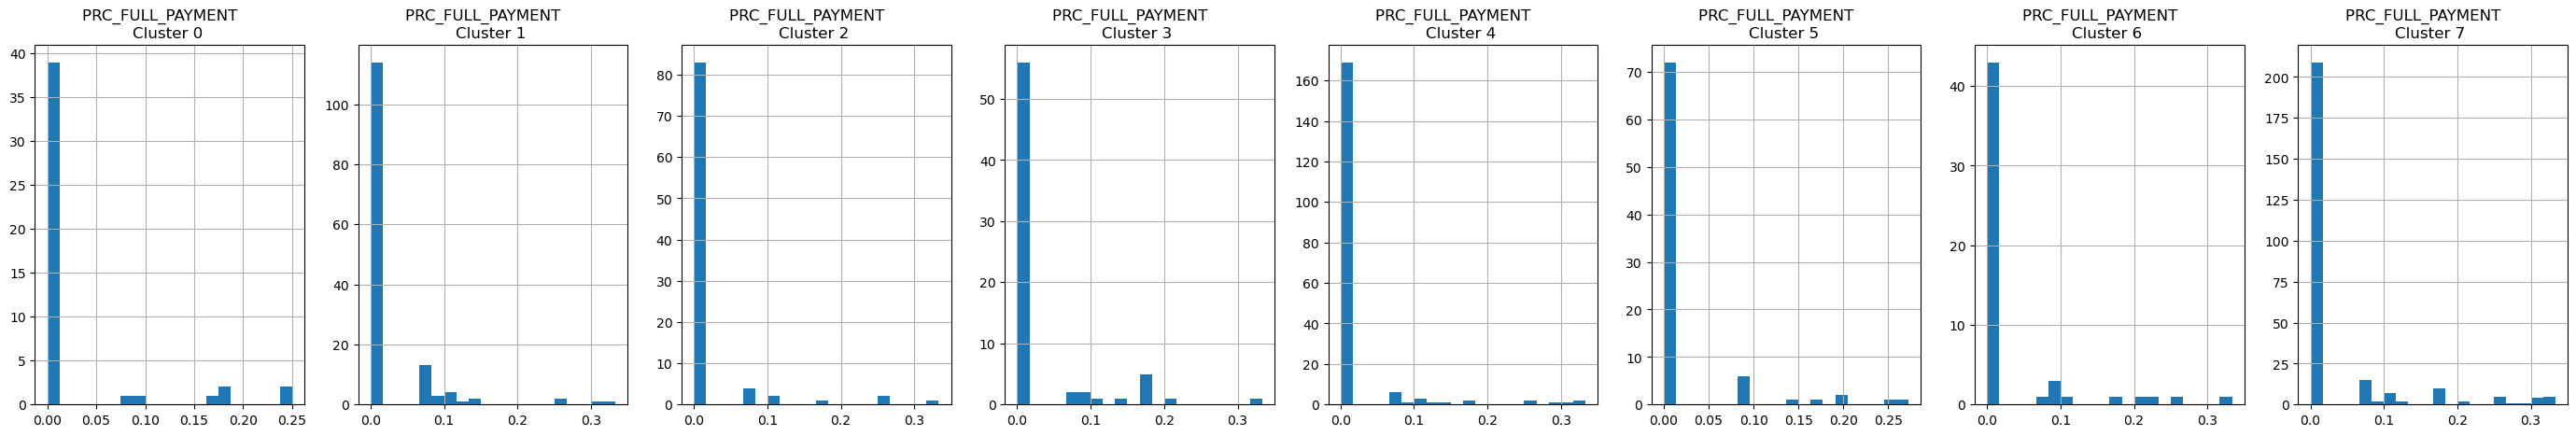

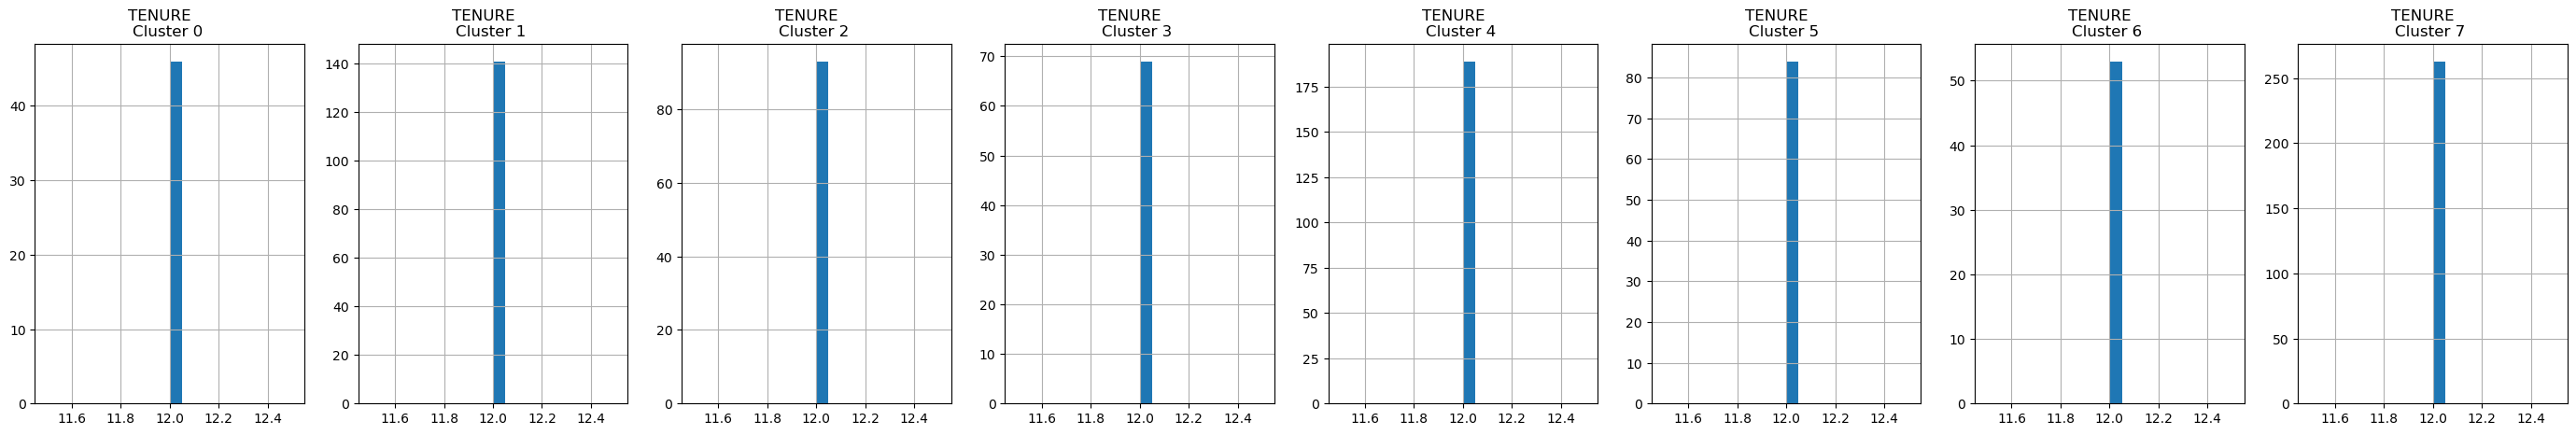

In [ ]:
for i in data.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = data_cluster[data_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [ ]:
silhouette_score_average = silhouette_score(data_scaled, kmeans.predict(data_scaled))
print(silhouette_score_average)

0.1838017315746133


# Dimensionality reduction

*As mentioned in the section where the correlations of the features in the dataset were calculated, we can eliminate some of the features that are highly correlated to each other.*

*We will use Principal Component Analysis (PCA) to reduce the dimensionality of the model while attempting to keep the original information. PCA tries to find a new set of features called components, such that these components consist of the uncorrelated given input features.*

In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data_scaled)
principal_comp

array([[-0.4981114 , -2.95638558],
       [-0.99552012, -1.82580775],
       [ 1.96750251, -0.28992837],
       ...,
       [ 3.04669139, -2.34279301],
       [ 1.14595047, -2.70042136],
       [ 1.41992209,  0.4327438 ]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1  pca2
0 -0.50 -2.96
1 -1.00 -1.83
2  1.97 -0.29
3  1.10  0.09
4 -2.11  0.33

In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1  pca2  cluster
0 -0.50 -2.96        0
1 -1.00 -1.83        7
2  1.97 -0.29        4
3  1.10  0.09        2
4 -2.11  0.33        5

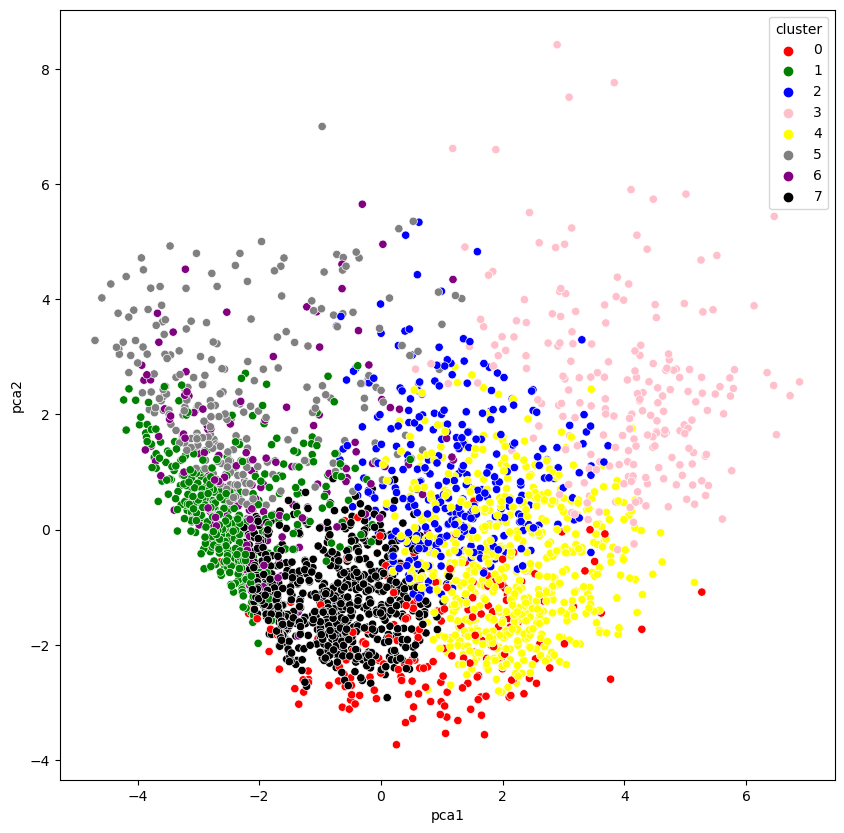

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

In [ ]:
silhouette_score_average = silhouette_score(data_scaled, kmeans.predict(data_scaled))
print(silhouette_score_average)

0.1838017315746133


*Another method for reducing dimensionality is to use an autoencoder. It creates a bottleneck and forces the model to create a compressed version of the original output. This method works best where some features are highly correlated to each other.*

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [ ]:
data_scaled.shape

(2986, 17)

In [ ]:
autoencoder.fit(data_scaled, data_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
24/24 [==============================] - 5s 67ms/step - loss: 0.5958
Epoch 2/25
24/24 [==============================] - 2s 86ms/step - loss: 0.4067
Epoch 3/25
24/24 [==============================] - 2s 103ms/step - loss: 0.3586
Epoch 4/25
24/24 [==============================] - 3s 112ms/step - loss: 0.3143
Epoch 5/25
24/24 [==============================] - 5s 197ms/step - loss: 0.2732
Epoch 6/25
24/24 [==============================] - 4s 180ms/step - loss: 0.2466
Epoch 7/25
24/24 [==============================] - 5s 198ms/step - loss: 0.2263
Epoch 8/25
24/24 [==============================] - 3s 125ms/step - loss: 0.2190
Epoch 9/25
24/24 [==============================] - 3s 110ms/step - loss: 0.2071
Epoch 10/25
24/24 [==============================] - 3s 105ms/step - loss: 0.2030
Epoch 11/25
24/24 [==============================] - 2s 92ms/step - loss: 0.1903
Epoch 12/25
24/24 [==============================] - 2s 92ms/step - loss: 0.1829
Epoch 13/25
24/24 [==========

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(data_scaled)

94/94 [==============================] - 0s 4ms/step


In [ ]:
pred.shape

(2986, 10)

In [ ]:
data_scaled.shape

(2986, 17)

*It can be seen that the model is shrunk, and now there are ten columns(features) instead of the original 17. The rest of the process is the same as the previous one.*

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` 

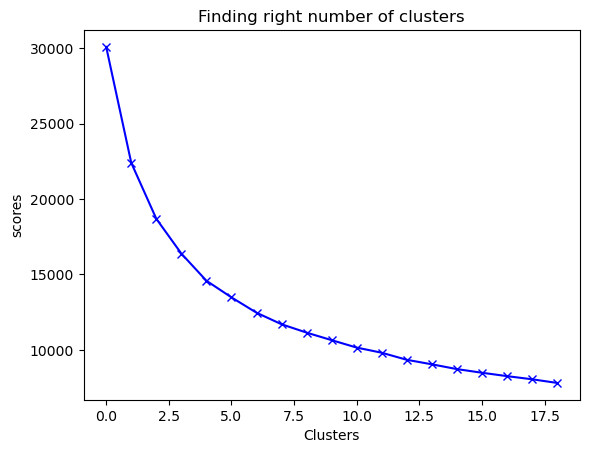

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5020\1215708519.py:1: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5020\1215708519.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.



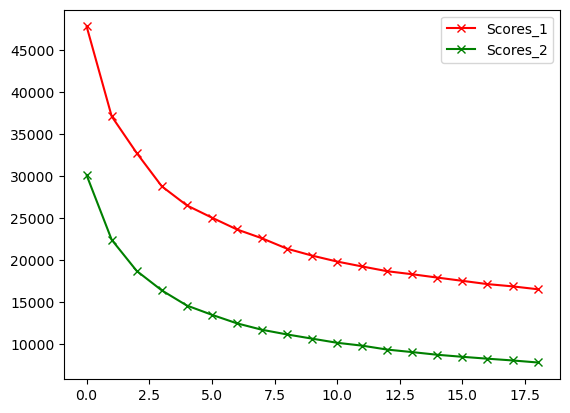

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r', label='Scores_1')
plt.plot(scores_2, 'bx-', color = 'g', label='Scores_2')
plt.legend()

*The comparison graph above shows the great change in the trends as in Scores_2, 4 or 5 clusters seem to be the best choice, using the elbow method.*

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(data_scaled)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
print(labels)
print(y_kmeans)

[2 0 3 ... 2 2 0]
[1 1 2 ... 2 2 2]


In [ ]:
df_cluster_dr = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.90               0.82      95.40              0.00   
4    817.71               1.00      16.00             16.00   
7  1,823.65               1.00     436.20              0.00   
8  1,014.93               1.00     861.49            661.49   
14 2,772.77               1.00       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.40          0.00                 0.17   
4                     0.00          0.00                 0.08   
7                   436.20          0.00                 1.00   
8                   200.00          0.00                 0.33   
14                    0.00        346.81                 0.00   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.00                              0.08   
4                         0.08                              0.00   
7                         0.00                              1.00   
8                         0.08                              0.25   
14                        0.00                              0.00   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.00              0.00           2.00      1,000.00   
4                     0.00              0.00           1.00      1,200.00   
7                     0.00              0.00          12.00      2,300.00   
8                     0.00              0.00           5.00      7,000.00   
14                    0.08              1.00           0.00      3,000.00   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0     201.80            139.51              0.00   12.00     2.00  
4     678.33            244.79              0.00   12.00     3.00  
7     679.07            532.03              0.00   12.00     0.00  
8     688.28            311.96              0.00   12.00     1.00  
14    805.65            989.96              0.00   12.00     0.00

In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

pca1  pca2
0  0.75 -0.74
1 -2.11 -0.44
2 -1.44 -1.52
3  0.02  0.21
4  0.34  1.35

In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1  pca2  cluster
0  0.75 -0.74        2
1 -2.11 -0.44        0
2 -1.44 -1.52        1
3  0.02  0.21        0
4  0.34  1.35        3

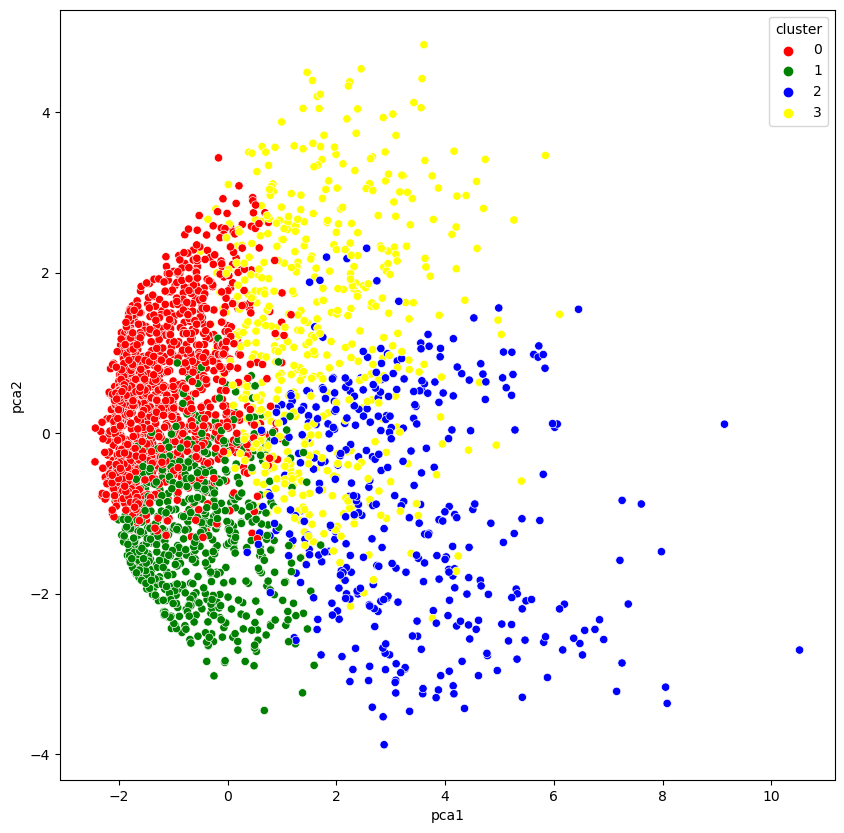

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

##Evaluating the model

In [ ]:
silhouette_score_average = silhouette_score(pred, labels)
print(silhouette_score_average)

0.23251557


*Clearly, a better segmentation is performed than the previous one. However, some of the information might not be used as they were lost in dimensionality reduction.*

(Note 1 : The silhouette score measures the similarity of each point to its own cluster compared to other clusters, and the silhouette plot visualizes these scores for each sample.)

(Note 2 : The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.)

In [ ]:
metrics.calinski_harabasz_score(pred, labels)

831.1066025898824

In [ ]:
davies_bouldin_score(pred, labels)

1.50940986370625

# Applying Agglomerative Hierarchy clustering

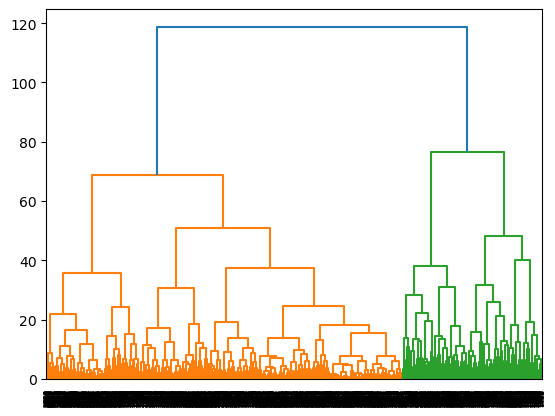

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(pred, method='ward'))

##Training the model

In [ ]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(pred)
label_hc = hc.labels_

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
df_cluster_dr = pd.concat([data, pd.DataFrame({'h_cluster':label_hc})], axis = 1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.90               0.82      95.40              0.00   
4    817.71               1.00      16.00             16.00   
7  1,823.65               1.00     436.20              0.00   
8  1,014.93               1.00     861.49            661.49   
14 2,772.77               1.00       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.40          0.00                 0.17   
4                     0.00          0.00                 0.08   
7                   436.20          0.00                 1.00   
8                   200.00          0.00                 0.33   
14                    0.00        346.81                 0.00   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.00                              0.08   
4                         0.08                              0.00   
7                         0.00                              1.00   
8                         0.08                              0.25   
14                        0.00                              0.00   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.00              0.00           2.00      1,000.00   
4                     0.00              0.00           1.00      1,200.00   
7                     0.00              0.00          12.00      2,300.00   
8                     0.00              0.00           5.00      7,000.00   
14                    0.08              1.00           0.00      3,000.00   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  h_cluster  
0     201.80            139.51              0.00   12.00       2.00  
4     678.33            244.79              0.00   12.00       0.00  
7     679.07            532.03              0.00   12.00       0.00  
8     688.28            311.96              0.00   12.00       3.00  
14    805.65            989.96              0.00   12.00       0.00

In [ ]:
hpca = PCA(n_components=2)
hprin_comp = hpca.fit_transform(pred)
hpca_df = pd.DataFrame(data = hprin_comp, columns =['pca1','pca2'])
hpca_df.head()

pca1  pca2
0  0.75 -0.74
1 -2.11 -0.44
2 -1.44 -1.52
3  0.02  0.21
4  0.34  1.35

In [ ]:
hpca_df = pd.concat([hpca_df,pd.DataFrame({'h_cluster':label_hc})], axis = 1)
hpca_df.head()

pca1  pca2  h_cluster
0  0.75 -0.74          2
1 -2.11 -0.44          0
2 -1.44 -1.52          3
3  0.02  0.21          0
4  0.34  1.35          0

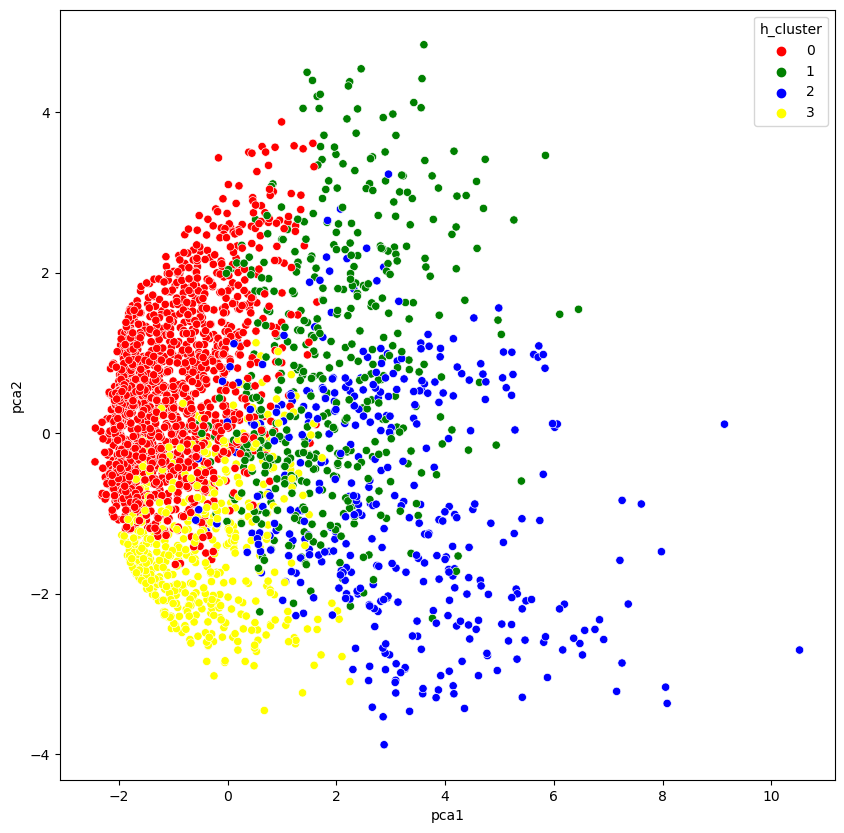

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "h_cluster", data = hpca_df, palette =['red','green','blue','yellow'])
plt.show()

In [ ]:
# plt.scatter(data_scaled[y_hc == 0, 0], data_scaled[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(data_scaled[y_hc == 1, 0], data_scaled[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(data_scaled[y_hc == 2, 0], data_scaled[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(data_scaled[y_hc == 3, 0], data_scaled[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.title('Clusters of customers')
# plt.legend()
# plt.show()

##Evaluating the model

In [ ]:
silhouette_score_average = silhouette_score(pred, label_hc)
print(silhouette_score_average)

0.21123703


In [ ]:
metrics.calinski_harabasz_score(pred, label_hc)

691.5821348940553

In [ ]:
davies_bouldin_score(pred, label_hc)

1.6505575406853215

# Applying DBSCAN clustering

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this part, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

Modeling

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms which works based on density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points
Epsilon determine a specified radius that if includes enough number of points within, we call it dense area
minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

In [ ]:
# Epsilon
# For epsilon, Use K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest 
# data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)   # minpoints - 1
nbrs = neigh.fit(pred)
distances, indices = nbrs.kneighbors(pred)
distances[:,1]

array([0.2115102 , 0.05702057, 0.32444353, ..., 1.28305092, 0.35785538,
       0.66337763])

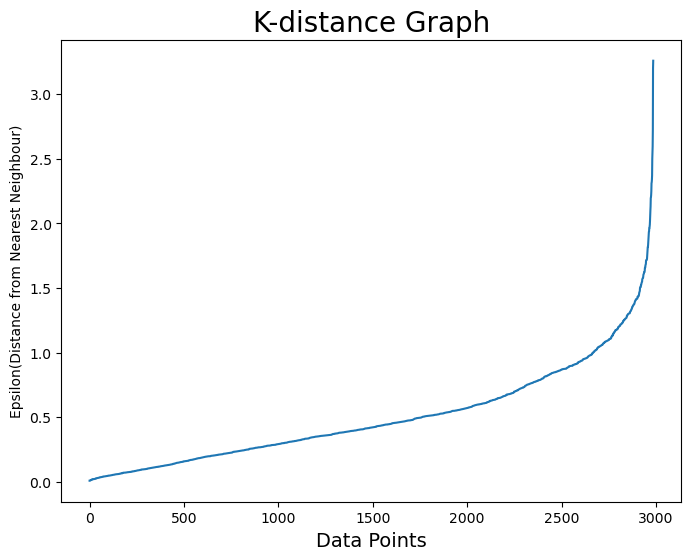

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points',fontsize=14)
plt.ylabel('Epsilon(Distance from Nearest Neighbour)')
plt.show()

## Training the model

In [ ]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=1, min_samples=12).fit(pred)

label_db = db.labels_
#'DBSCAN with epsilon 1, min samples 12'

In [ ]:
df_cluster_dr = pd.concat([data, pd.DataFrame({'dbs_cluster':label_db})], axis = 1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.90               0.82      95.40              0.00   
4    817.71               1.00      16.00             16.00   
7  1,823.65               1.00     436.20              0.00   
8  1,014.93               1.00     861.49            661.49   
14 2,772.77               1.00       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.40          0.00                 0.17   
4                     0.00          0.00                 0.08   
7                   436.20          0.00                 1.00   
8                   200.00          0.00                 0.33   
14                    0.00        346.81                 0.00   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.00                              0.08   
4                         0.08                              0.00   
7                         0.00                              1.00   
8                         0.08                              0.25   
14                        0.00                              0.00   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.00              0.00           2.00      1,000.00   
4                     0.00              0.00           1.00      1,200.00   
7                     0.00              0.00          12.00      2,300.00   
8                     0.00              0.00           5.00      7,000.00   
14                    0.08              1.00           0.00      3,000.00   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  dbs_cluster  
0     201.80            139.51              0.00   12.00        -1.00  
4     678.33            244.79              0.00   12.00         0.00  
7     679.07            532.03              0.00   12.00         0.00  
8     688.28            311.96              0.00   12.00         0.00  
14    805.65            989.96              0.00   12.00         0.00

In [ ]:
dbpca = PCA(n_components=2)
dbprin_comp = dbpca.fit_transform(pred)
dbpca_df = pd.DataFrame(data = dbprin_comp, columns =['pca1','pca2'])
dbpca_df.head()

pca1  pca2
0  0.75 -0.74
1 -2.11 -0.44
2 -1.44 -1.52
3  0.02  0.21
4  0.34  1.35

In [ ]:
dbpca_df = pd.concat([dbpca_df,pd.DataFrame({'dbs_cluster':label_db})], axis = 1)
dbpca_df.head()

pca1  pca2  dbs_cluster
0  0.75 -0.74           -1
1 -2.11 -0.44            0
2 -1.44 -1.52            0
3  0.02  0.21            0
4  0.34  1.35            0

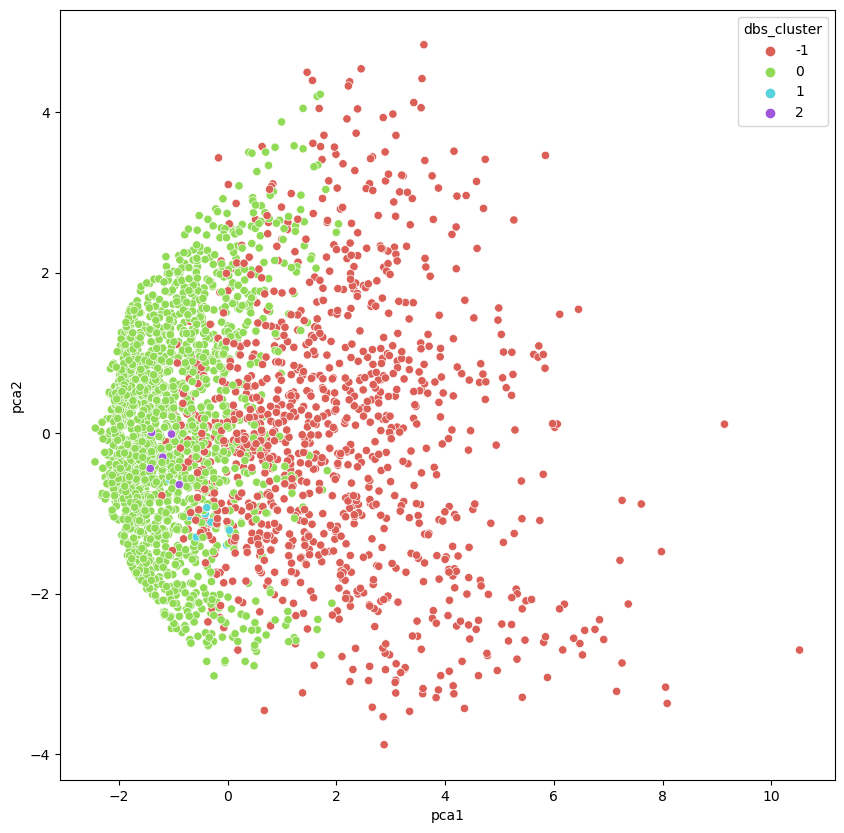

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "dbs_cluster", data = dbpca_df,  palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
#palette =['red','green','blue','yellow']
plt.show()

## Evaluating the model

In [ ]:
silhouette_score_average = silhouette_score(pred, label_db)
print(silhouette_score_average)

0.009103375


In [ ]:
metrics.calinski_harabasz_score(pred, label_db)

279.2705350669088

In [ ]:
davies_bouldin_score(pred, label_db)

1.5142564571117614

# Applying GMM algorithm

In [ ]:
from matplotlib import colors
from tqdm import tqdm as tqdm
%matplotlib inline
import plotly as pl
import plotly.graph_objs as go
import plotly.express as px
from sklearn import metrics
# gmm
from sklearn.mixture import GaussianMixture

In [ ]:
#Choosing the number of cluster

def gmm_bic(a, lower=2, upper=10):
    bic = []
    for i in tqdm(range(lower,upper)):
        gm = GaussianMixture(n_components=i, covariance_type="full",max_iter=300, random_state=42)
        gm.fit(a)
        b = gm.bic(a)
        bic.append(b)
        print('Convergence? {} at iteration {}'.format(gm.converged_, gm.n_iter_))
    fig = go.Figure(data=go.Scatter(x=np.arange(lower,upper), y=bic))
    fig.update_layout(title='BIC',
                   xaxis_title='Numbe of Clusters',
                   yaxis_title='BIC')
    fig.show()

In [ ]:
gmm_bic(pred)

 12%|██████████▌                                                                         | 1/8 [00:00<00:01,  5.82it/s]

Convergence? True at iteration 54


 25%|█████████████████████                                                               | 2/8 [00:00<00:01,  4.75it/s]

Convergence? True at iteration 57


 50%|██████████████████████████████████████████                                          | 4/8 [00:00<00:00,  4.21it/s]

Convergence? True at iteration 58
Convergence? True at iteration 28


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:01<00:00,  3.35it/s]

Convergence? True at iteration 53


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:01<00:00,  3.14it/s]

Convergence? True at iteration 41


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:02<00:00,  2.74it/s]

Convergence? True at iteration 46


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.92it/s]

Convergence? True at iteration 58


##Training the model

In [ ]:
gmm = GaussianMixture(n_components=4, max_iter=300, random_state=42)
gmm.fit(pred)
label_gmm = gmm.predict(pred)

In [ ]:
df_cluster_dr = pd.concat([data, pd.DataFrame({'gmm_cluster':label_gmm})], axis = 1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.90               0.82      95.40              0.00   
4    817.71               1.00      16.00             16.00   
7  1,823.65               1.00     436.20              0.00   
8  1,014.93               1.00     861.49            661.49   
14 2,772.77               1.00       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.40          0.00                 0.17   
4                     0.00          0.00                 0.08   
7                   436.20          0.00                 1.00   
8                   200.00          0.00                 0.33   
14                    0.00        346.81                 0.00   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.00                              0.08   
4                         0.08                              0.00   
7                         0.00                              1.00   
8                         0.08                              0.25   
14                        0.00                              0.00   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.00              0.00           2.00      1,000.00   
4                     0.00              0.00           1.00      1,200.00   
7                     0.00              0.00          12.00      2,300.00   
8                     0.00              0.00           5.00      7,000.00   
14                    0.08              1.00           0.00      3,000.00   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  gmm_cluster  
0     201.80            139.51              0.00   12.00         1.00  
4     678.33            244.79              0.00   12.00         0.00  
7     679.07            532.03              0.00   12.00         2.00  
8     688.28            311.96              0.00   12.00         3.00  
14    805.65            989.96              0.00   12.00         0.00

In [ ]:
gmmpca = PCA(n_components=2)
gmmprin_comp = gmmpca.fit_transform(pred)
gmmpca_df = pd.DataFrame(data = gmmprin_comp, columns =['pca1','pca2'])
gmmpca_df.head()

pca1  pca2
0  0.75 -0.74
1 -2.11 -0.44
2 -1.44 -1.52
3  0.02  0.21
4  0.34  1.35

In [ ]:
gmmpca_df = pd.concat([gmmpca_df,pd.DataFrame({'gmm_cluster':label_gmm})], axis = 1)
gmmpca_df.head()

pca1  pca2  gmm_cluster
0  0.75 -0.74            1
1 -2.11 -0.44            3
2 -1.44 -1.52            3
3  0.02  0.21            0
4  0.34  1.35            0

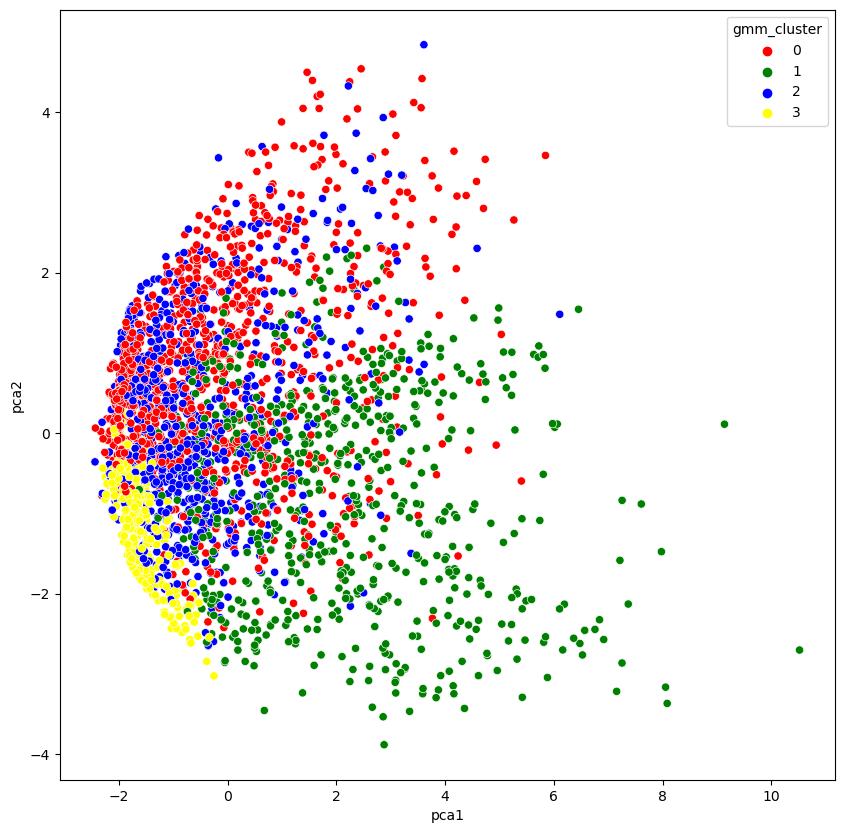

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "gmm_cluster", data = gmmpca_df, palette =['red','green','blue','yellow'])
plt.show()

In [ ]:
# #display
# pd.options.display.float_format = '{:,.2f}'.format
# output = a[features].groupby('Segment').mean().T
# output.to_csv('result.csv')
# #show gradient
# def background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
#     rng = M - m
#     norm = colors.Normalize(m - (rng * low),
#                             M + (rng * high))
#     normed = norm(s.values)
#     c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
#     return ['background-color: %s' % color for color in c]
# # display output with gradient
# output.style.apply(background_gradient,
# #                highlight_max(output),
#                cmap='PuBu',
#                m=output.min().min(),
#                M=output.max().max(),
#                low=0,
#                high=0.2).format('{:,.2f}')

In [ ]:
#a.groupby('Segment').size()

## Evaluating the model

In [ ]:
silhouette_score_average = silhouette_score(pred, label_gmm)
print(silhouette_score_average)

0.013788075


In [ ]:
metrics.calinski_harabasz_score(pred, label_gmm)

355.0487693877875

In [ ]:
davies_bouldin_score(pred, label_gmm)

2.7494322290265463

# Conclusion

Therefore by evaluating both the models on various metric indices we come to the conclusion that for our current data-set applying K-means is best suited for customer segmentation.